# **Importing Libraries**

In [ ]:
import os
import warnings
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Suppress warnings
warnings.filterwarnings('ignore')

# **Loading and Processing Data**

In [45]:
# Creating File Path for Data
file_path = 'Data HGS NCD Malaysia.xls'

# Load the Excel file
df = pd.read_excel(file_path, engine='xlrd')  # Use 'xlrd' for .xls files

# Display the first few rows and columns
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nColumns in the dataset:")
print(df.columns.tolist())


First few rows of the dataset:
   Locality AreaCode  Age  Sex  Marital_status  Ethnicity  Religion  \
0         0  BJ05003   72    0               0          2         2   
1         0  AA04002   69    0               0          2         2   
2         1  HL03008   76    1               3          0         0   
3         0  IJ03005   67    1               0          0         0   
4         0  JE07010   62    0               0          0         0   

   Family_composition  Highest_education_level_achieved  \
0                   1                                 2   
1                   1                                 2   
2                   0                                 1   
3                   1                                 2   
4                   1                                 3   

   Current_employment_status  ...  Malaria  Gynaecological_disease  Others  \
0                          1  ...       No                      No           
1                          1  

In [3]:
# Define features and target variable
features = ['Age', 'Sex', 'BMI', 'GripStrength']
target = 'Musculoskeletal_disease'

# Check if all required columns are present
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in dataset: {missing_cols}")

# Convert 'Sex' column to numeric
df['Sex'] = pd.to_numeric(df['Sex'], errors='coerce')

In [4]:
# Create the feature matrix X and the target vector y
X = df[features]
y = df[target].map({'Yes': 1, 'No': 0})  # Convert target to binary (Yes=1, No=0)

# Display missing values count
print("\nMissing values in features:")
print(X.isnull().sum())


Missing values in features:
Age             0
Sex             0
BMI             0
GripStrength    0
dtype: int64


In [5]:
# Create the subset with only the required columns
df_selected = df[features + [target]]

# Display the basic information about the selected dataset
print("\nSelected Dataset Information:")
print(df_selected.info())  # Data types, non-null counts, and memory usage

print("\nSummary Statistics of Selected Dataset:")
print(df_selected.describe())  # Summary statistics for numerical columns


Selected Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1204 non-null   int64  
 1   Sex                      1204 non-null   int64  
 2   BMI                      1204 non-null   float64
 3   GripStrength             1204 non-null   float64
 4   Musculoskeletal_disease  1204 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 47.2+ KB
None

Summary Statistics of Selected Dataset:
               Age          Sex          BMI  GripStrength
count  1204.000000  1204.000000  1204.000000   1204.000000
mean     68.645349     0.427741    26.810581     25.468439
std       6.359915     0.494957     5.038798      8.481475
min      60.000000     0.000000    12.720000      1.500000
25%      63.000000     0.000000    23.547500     19.000000
50%      68.000000    

In [6]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames to retain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

In [7]:
# Check class distribution before applying SMOTE
print("\nClass distribution before SMOTE:")
print(y_train.value_counts(normalize=True))

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Convert the SMOTE output back to DataFrame
X_train_balanced = pd.DataFrame(X_train_balanced, columns=features)

# Check class distribution after applying SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))


Class distribution before SMOTE:
0    0.843198
1    0.156802
Name: Musculoskeletal_disease, dtype: float64

Class distribution after SMOTE:
0    0.5
1    0.5
Name: Musculoskeletal_disease, dtype: float64


In [8]:
# Dataset Overview
print("\nDataset information:")
print(f"Training set shape: {X_train_balanced.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")
print("\nFeature statistics in training set:")
print(X_train_balanced.describe())


Dataset information:
Training set shape: (1624, 4)
Testing set shape: (241, 4)

Feature statistics in training set:
               Age          Sex          BMI  GripStrength
count  1624.000000  1624.000000  1624.000000   1624.000000
mean      0.023470     0.017678     0.139258     -0.052443
std       0.976026     1.002728     0.994711      0.980461
min      -1.385655    -0.864715    -2.800208     -2.862161
25%      -0.747651    -0.864715    -0.530682     -0.755194
50%      -0.109647    -0.864715     0.082945     -0.182885
75%       0.528357     1.156451     0.680515      0.650668
max       3.558877     1.156451     3.750347      3.151326


# **Exploratory Data Analysis**

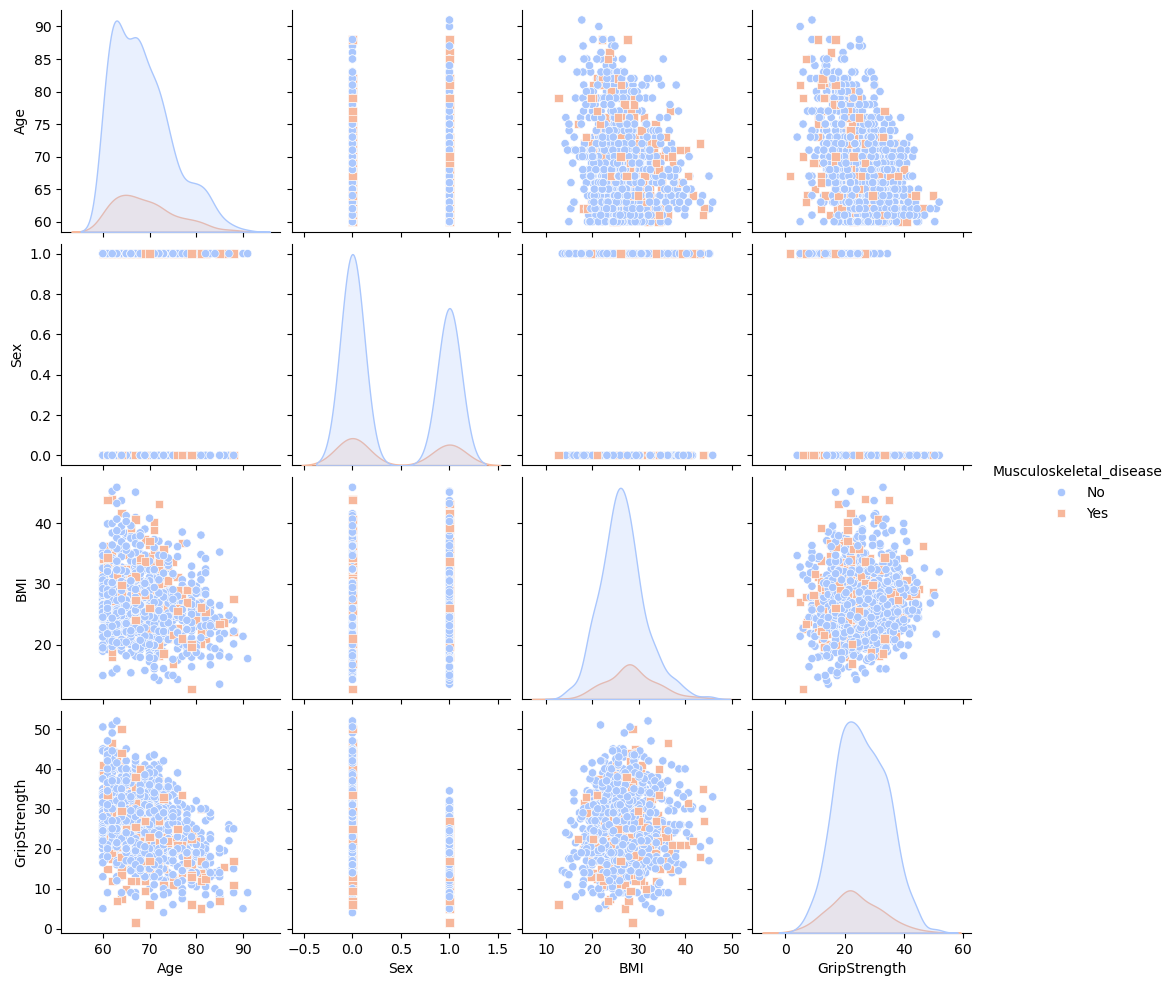

In [9]:
# Pairplot colored by the target variable 'Musculoskeletal_disease'
sns.pairplot(df_selected, hue='Musculoskeletal_disease', palette='coolwarm', markers=['o', 's'])

# Display the plot
plt.show()

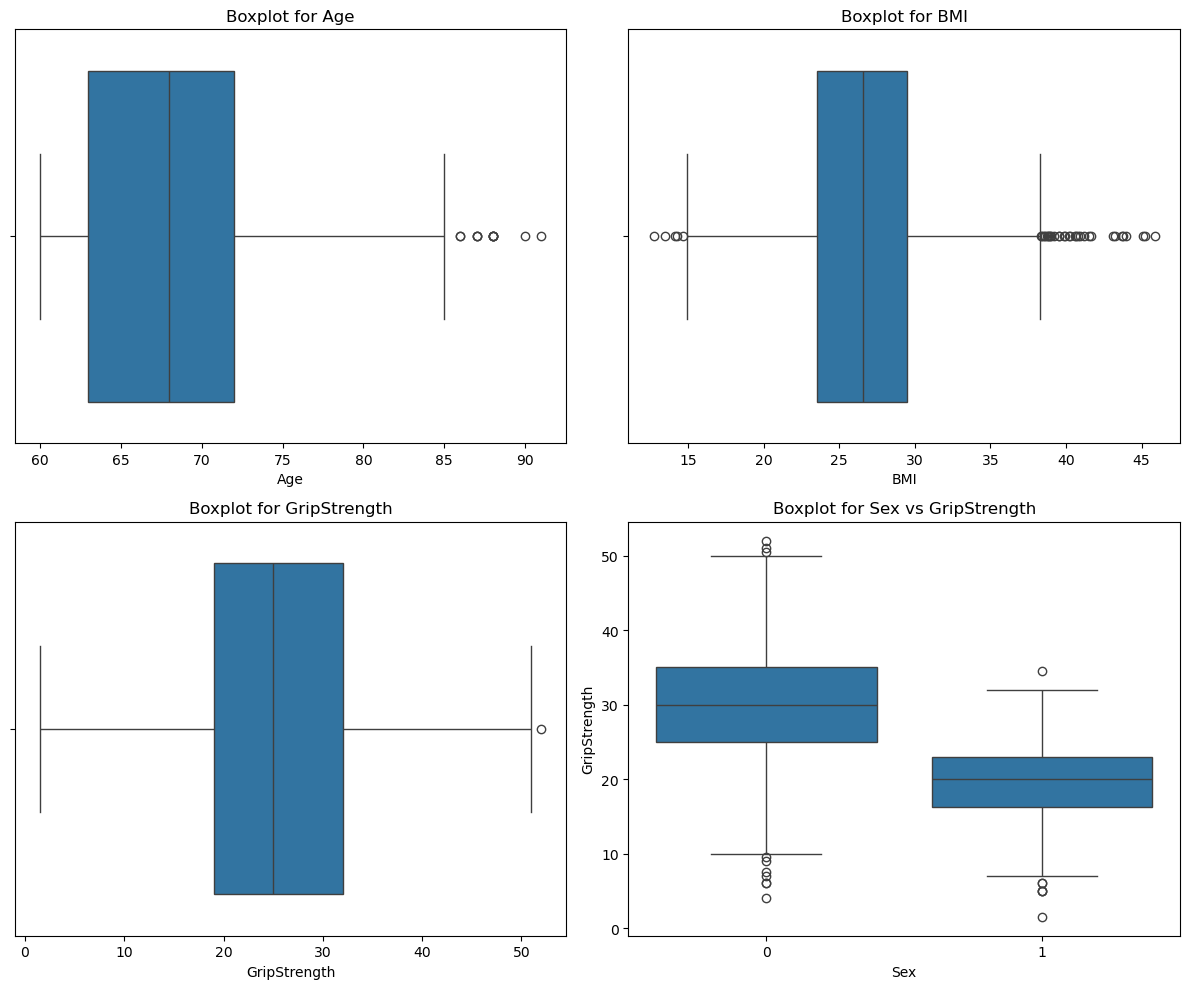

In [11]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot for 'Age'
sns.boxplot(x=df_selected['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot for Age')

# Boxplot for 'BMI'
sns.boxplot(x=df_selected['BMI'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot for BMI')

# Boxplot for 'GripStrength'
sns.boxplot(x=df_selected['GripStrength'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot for GripStrength')

# Boxplot for 'Sex' vs 'GripStrength' (categorical vs numerical)
sns.boxplot(x=df_selected['Sex'], y=df_selected['GripStrength'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot for Sex vs GripStrength')

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

# **Neural Network Model**


Optimizing for F1-score...
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits

F1-score Optimized Model Best Parameters:
  activation: relu
  alpha: 0.005
  early_stopping: True
  hidden_layer_sizes: (180, 90)
  learning_rate_init: 0.01
  max_iter: 2000
  n_iter_no_change: 10
  solver: adam
  validation_fraction: 0.1
Best cross-validation score for F1-score: 0.732
Number of iterations before stopping: 17



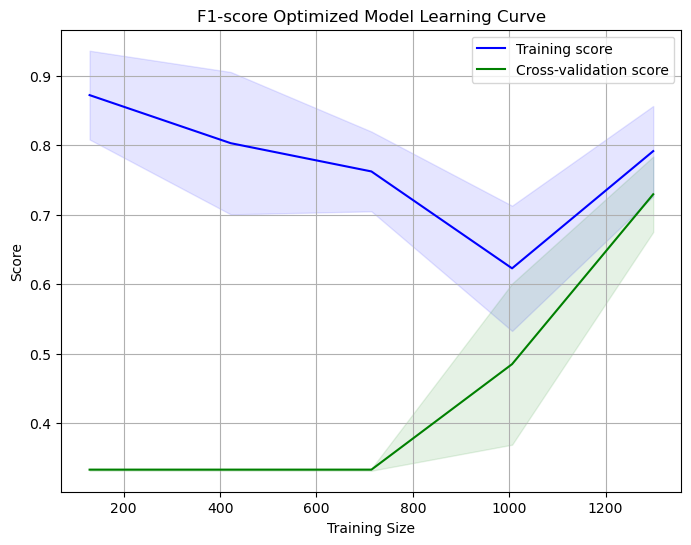


Optimizing for Precision...
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/an


Precision Optimized Model Best Parameters:
  activation: relu
  alpha: 0.005
  early_stopping: True
  hidden_layer_sizes: (180, 90)
  learning_rate_init: 0.01
  max_iter: 2000
  n_iter_no_change: 10
  solver: adam
  validation_fraction: 0.1
Best cross-validation score for Precision: 0.741
Number of iterations before stopping: 17



/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/an

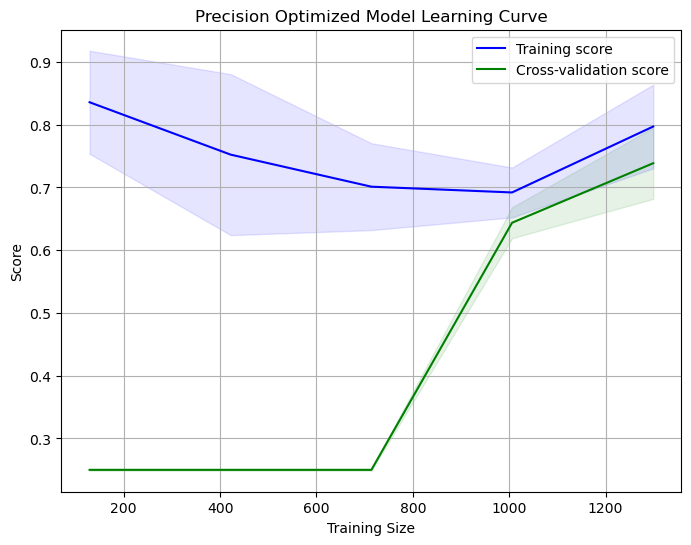


Optimizing for Recall...
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits

Recall Optimized Model Best Parameters:
  activation: relu
  alpha: 0.005
  early_stopping: True
  hidden_layer_sizes: (180, 90)
  learning_rate_init: 0.01
  max_iter: 2000
  n_iter_no_change: 10
  solver: adam
  validation_fraction: 0.1
Best cross-validation score for Recall: 0.734
Number of iterations before stopping: 17



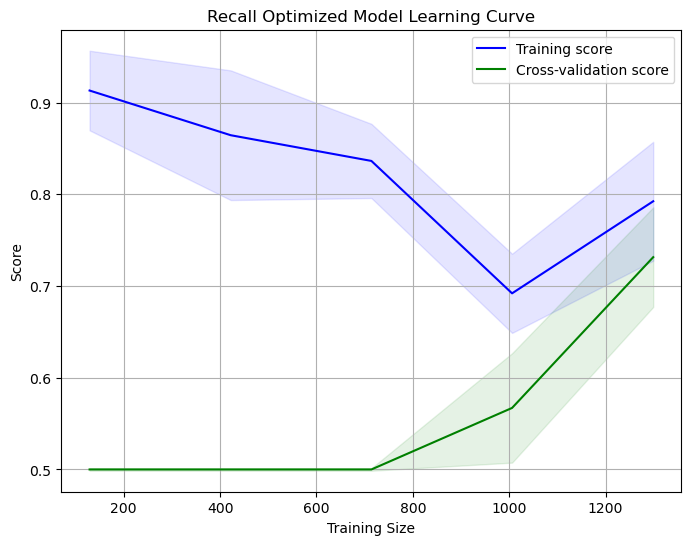


Total training time: 369.96 seconds


In [12]:
def train_base_and_sub_models(X_train, y_train):
    """
    Train base and sub-models optimized for F1, precision, and recall using the specified parameter grid.
    """
    ffnn = MLPClassifier(random_state=42)

    # Define the parameter grid
    param_grid = {
        'hidden_layer_sizes': [(n,) for n in range(10, 201, 10)] + [(n, n // 2) for n in range(10, 201, 10)],
        'activation': ['relu', 'tanh'],
        'learning_rate_init': [0.001, 0.005, 0.01],
        'max_iter': [2000],
        'early_stopping': [True],
        'validation_fraction': [0.1],
        'n_iter_no_change': [10],
        'solver': ['adam'],
        'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01]
    }

    # Metrics to optimize
    scoring_metrics = {
        'F1-score': 'f1_weighted',
        'Precision': 'precision_weighted',
        'Recall': 'recall_weighted'
    }

    nn_models = {}
    for metric_name, scoring in scoring_metrics.items():
        print(f"\nOptimizing for {metric_name}...")
        grid_search = GridSearchCV(
            ffnn,
            param_grid,
            cv=5,
            scoring=scoring,
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        nn_models[metric_name] = best_model

        # Print best parameters and scores
        print(f"\n{metric_name} Optimized Model Best Parameters:")
        for param, value in grid_search.best_params_.items():
            print(f"  {param}: {value}")
        print(f"Best cross-validation score for {metric_name}: {grid_search.best_score_:.3f}")
        print(f"Number of iterations before stopping: {best_model.n_iter_}\n")

        # Plot learning curve for the model
        plot_learning_curve(best_model, X_train, y_train, title=f"{metric_name} Optimized Model Learning Curve", scoring=scoring)

    return nn_models


def plot_learning_curve(model, X_train, y_train, title="Learning Curve", scoring='f1_weighted'):
    """Generate and plot learning curves for a given model."""
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Compute the mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training score', color='blue')
    plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')

    # Plot the confidence intervals as shaded regions
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Capture the start time before training begins
start_time = time.time()

# Train and get the models optimized for F1, Precision, and Recall
nn_models = train_base_and_sub_models(X_train_balanced, y_train_balanced)

# Calculate the total execution time
execution_time = time.time() - start_time
print(f"\nTotal training time: {execution_time:.2f} seconds")


F1-score Metrics:
Precision: 0.775
Recall: 0.693
F1-score: 0.726

Precision Metrics:
Precision: 0.775
Recall: 0.693
F1-score: 0.726

Recall Metrics:
Precision: 0.775
Recall: 0.693
F1-score: 0.726


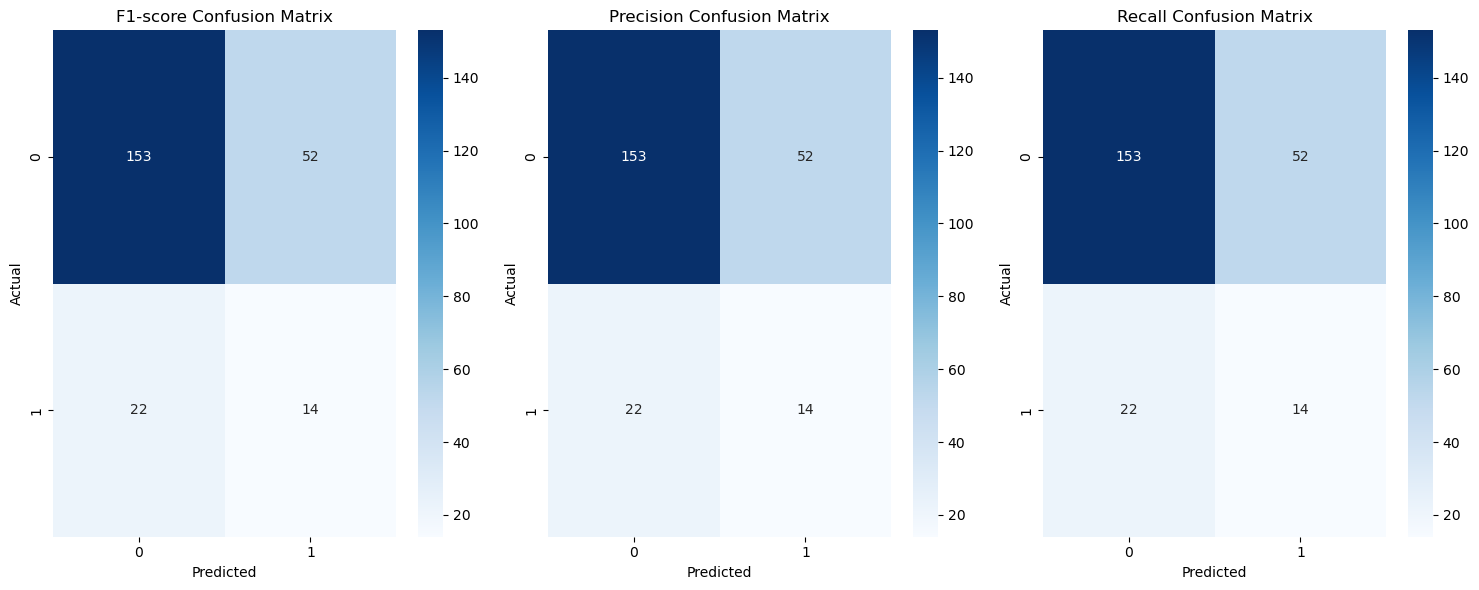

In [47]:
# Function to print precision, recall, and F1 score for a model
def print_metrics(y_true, y_pred):
    """Print precision, recall, and F1 score for a model."""
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")

# Function to plot confusion matrices for each model in a single row
def plot_confusion_matrices(nn_models, X_test, y_test):
    """Plot confusion matrices for each model in a single row."""
    n_models = len(nn_models)
    
    # Create a figure with subplots in a single row
    fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 6))  # Adjust width based on the number of models
    if n_models == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one model

    for idx, (model_name, model) in enumerate(nn_models.items()):
        # Predict labels using the model
        y_pred = model.predict(X_test)
        
        # Compute the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot the confusion matrix using Seaborn heatmap
        sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, xticklabels=model.classes_, yticklabels=model.classes_, ax=axes[idx])
        axes[idx].set_title(f"{model_name} Confusion Matrix")
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')
        
        # Print the precision, recall, and F1-score for the model
        print(f"\n{model_name} Metrics:")
        print_metrics(y_test, y_pred)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Plot confusion matrices and metrics for all models
plot_confusion_matrices(nn_models, X_test_scaled, y_test)

<Figure size 1000x600 with 0 Axes>

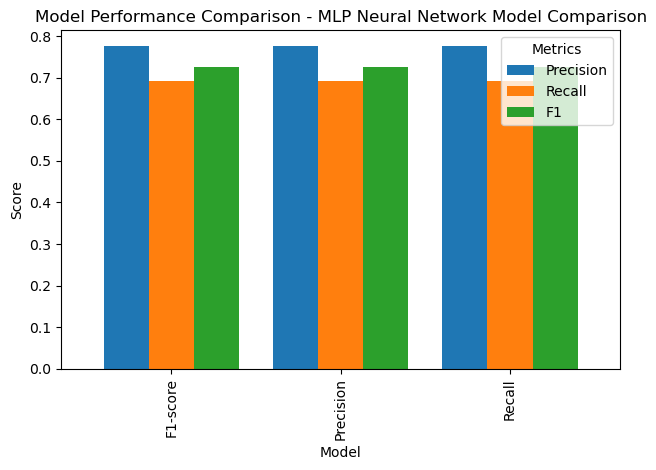

In [14]:
# Function to plot comparison of model performances (Precision, Recall, F1)
def plot_model_comparison(y_test, nn_models, X_test, title):
    """Plot comparison of model performances."""
    metrics = []
    for name, model in nn_models.items():
        y_pred = model.predict(X_test)
        metrics.append({
            'Model': name,
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1': f1_score(y_test, y_pred, average='weighted')
        })
    
    df = pd.DataFrame(metrics)
    df.set_index('Model', inplace=True)
    
    plt.figure(figsize=(10, 6))
    df.plot(kind='bar', width=0.8)
    plt.title(f'Model Performance Comparison - {title}')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.legend(title='Metrics')
    plt.tight_layout()
    plt.show()

# Plot comparison of the models (F1, Precision, Recall optimized)
plot_model_comparison(y_test, nn_models, X_test_scaled, "MLP Neural Network Model Comparison")

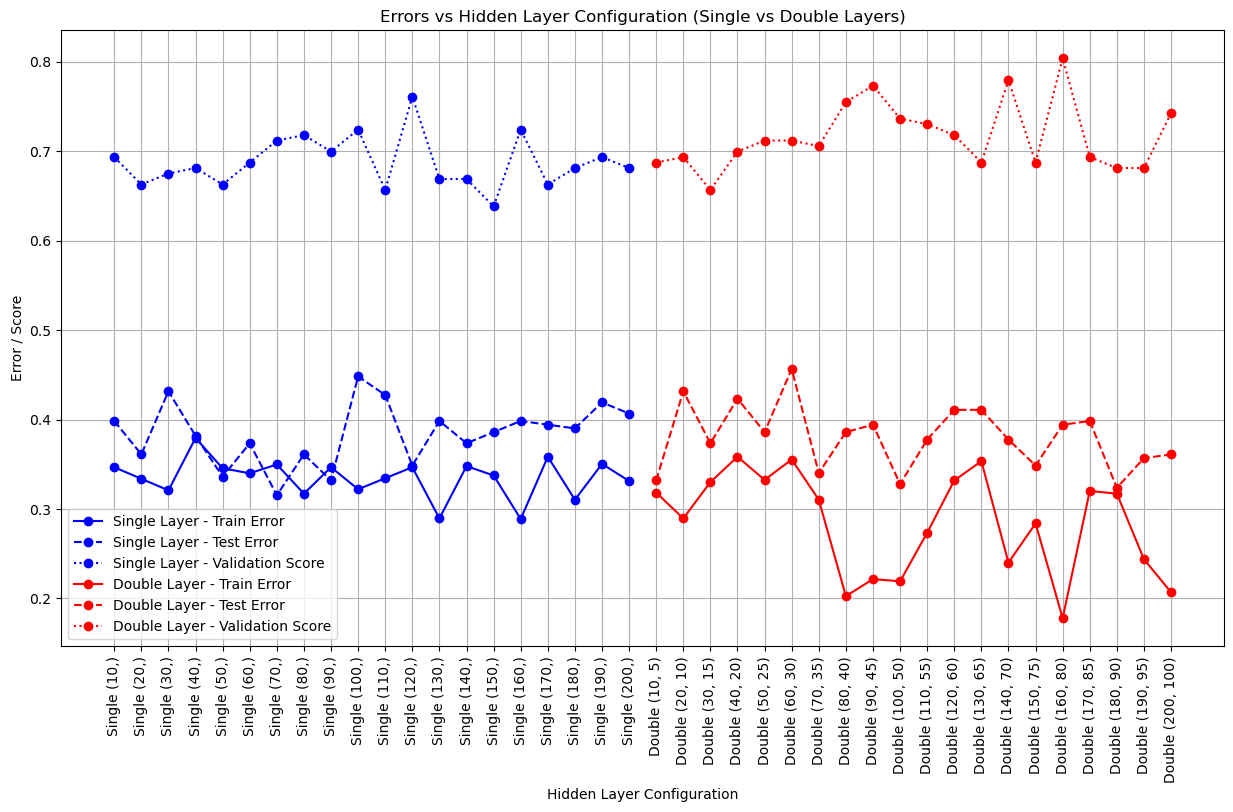

In [15]:
# Define single-layer and double-layer configurations
single_layer_sizes = [(n,) for n in range(10, 201, 10)]  # Single-layer from 10 to 200 neurons
double_layer_sizes = [(n, n // 2) for n in range(10, 201, 10)]  # Double-layer with second layer half the size of the first

# Results container
results = {'Configuration': [], 'Layer Type': [], 'Train Error': [], 'Test Error': [], 'Validation Score': []}

# Evaluate single-layer configurations
for layers in single_layer_sizes:
    model = MLPClassifier(
        hidden_layer_sizes=layers,
        activation='relu',
        learning_rate_init=0.01,
        alpha=0.0001,
        max_iter=2000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
    model.fit(X_train_balanced, y_train_balanced)
    
    # Compute metrics
    train_error = 1 - accuracy_score(y_train_balanced, model.predict(X_train_balanced))
    test_error = 1 - accuracy_score(y_test, model.predict(X_test_scaled))
    val_score = max(model.validation_scores_) if hasattr(model, 'validation_scores_') else None
    
    # Store results
    results['Configuration'].append(f"Single {layers}")
    results['Layer Type'].append('Single Layer')
    results['Train Error'].append(train_error)
    results['Test Error'].append(test_error)
    results['Validation Score'].append(val_score)

# Evaluate double-layer configurations
for layers in double_layer_sizes:
    model = MLPClassifier(
        hidden_layer_sizes=layers,
        activation='relu',
        learning_rate_init=0.01,
        alpha=0.0001,
        max_iter=2000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
    model.fit(X_train_balanced, y_train_balanced)
    
    # Compute metrics
    train_error = 1 - accuracy_score(y_train_balanced, model.predict(X_train_balanced))
    test_error = 1 - accuracy_score(y_test, model.predict(X_test_scaled))
    val_score = max(model.validation_scores_) if hasattr(model, 'validation_scores_') else None
    
    # Store results
    results['Configuration'].append(f"Double {layers}")
    results['Layer Type'].append('Double Layer')
    results['Train Error'].append(train_error)
    results['Test Error'].append(test_error)
    results['Validation Score'].append(val_score)

# Plot with clear distinction between Single and Double Layer
plt.figure(figsize=(15, 8))

# Plot for Single Layer
single_layer_subset = {
    key: [val for i, val in enumerate(results[key]) if results['Layer Type'][i] == 'Single Layer']
    for key in results
}

plt.plot(single_layer_subset['Configuration'], single_layer_subset['Train Error'], label='Single Layer - Train Error', marker='o', linestyle='-', color='blue')
plt.plot(single_layer_subset['Configuration'], single_layer_subset['Test Error'], label='Single Layer - Test Error', marker='o', linestyle='--', color='blue')
plt.plot(single_layer_subset['Configuration'], single_layer_subset['Validation Score'], label='Single Layer - Validation Score', marker='o', linestyle=':', color='blue')

# Plot for Double Layer
double_layer_subset = {
    key: [val for i, val in enumerate(results[key]) if results['Layer Type'][i] == 'Double Layer']
    for key in results
}

plt.plot(double_layer_subset['Configuration'], double_layer_subset['Train Error'], label='Double Layer - Train Error', marker='o', linestyle='-', color='red')
plt.plot(double_layer_subset['Configuration'], double_layer_subset['Test Error'], label='Double Layer - Test Error', marker='o', linestyle='--', color='red')
plt.plot(double_layer_subset['Configuration'], double_layer_subset['Validation Score'], label='Double Layer - Validation Score', marker='o', linestyle=':', color='red')

# Final plot adjustments
plt.xlabel('Hidden Layer Configuration')
plt.ylabel('Error / Score')
plt.title('Errors vs Hidden Layer Configuration (Single vs Double Layers)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

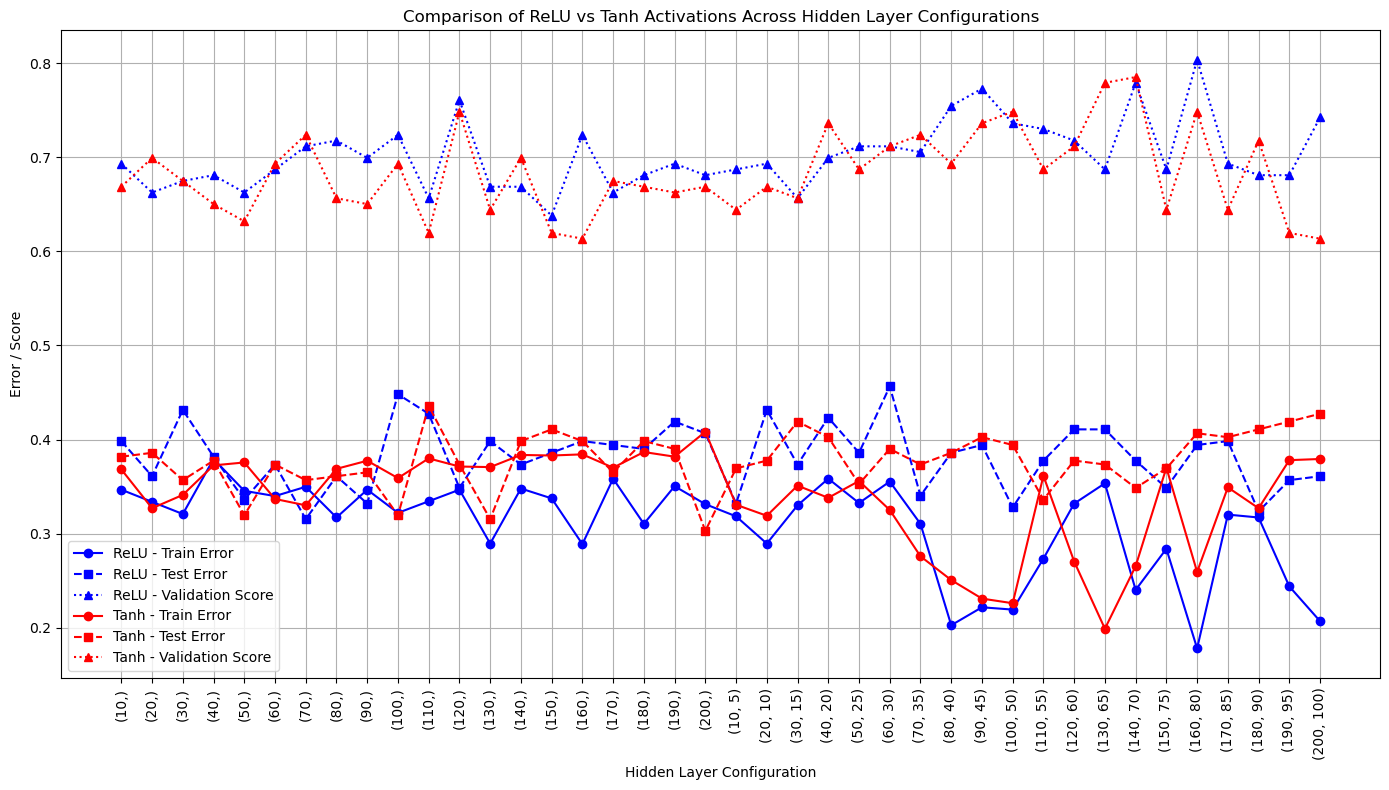

In [16]:
# Define single-layer and double-layer configurations
single_layer_sizes = [(n,) for n in range(10, 201, 10)]  # Single-layer from 10 to 200 neurons
double_layer_sizes = [(n, n // 2) for n in range(10, 201, 10)]  # Double-layer with second layer half the size of the first

# Combine single-layer and double-layer configurations
hidden_layer_sizes = single_layer_sizes + double_layer_sizes

# Define activation functions to compare
activations = ['relu', 'tanh']

# Results container
activation_results = {'Activation': [], 'Hidden Layers': [], 'Train Error': [], 'Test Error': [], 'Validation Score': []}

# Evaluate for ReLU and Tanh
for activation in activations:
    for layers in hidden_layer_sizes:
        model = MLPClassifier(
            hidden_layer_sizes=layers,
            activation=activation,
            learning_rate_init=0.01,
            alpha=0.0001,
            max_iter=2000,
            random_state=42,
            early_stopping=True,
            validation_fraction=0.1
        )
        model.fit(X_train_balanced, y_train_balanced)
        
        # Compute metrics
        train_error = 1 - accuracy_score(y_train_balanced, model.predict(X_train_balanced))
        test_error = 1 - accuracy_score(y_test, model.predict(X_test_scaled))
        val_score = max(model.validation_scores_) if hasattr(model, 'validation_scores_') else None
        
        # Store results
        activation_results['Activation'].append(activation)
        activation_results['Hidden Layers'].append(str(layers))
        activation_results['Train Error'].append(train_error)
        activation_results['Test Error'].append(test_error)
        activation_results['Validation Score'].append(val_score)

# Plot results
plt.figure(figsize=(14, 8))

# Use distinct line styles and colors for ReLU and Tanh
for activation in activations:
    subset = {
        key: [val for i, val in enumerate(activation_results[key]) if activation_results['Activation'][i] == activation]
        for key in activation_results
    }
    
    if activation == 'relu':
        plt.plot(
            subset['Hidden Layers'],
            subset['Train Error'],
            label=f'ReLU - Train Error',
            marker='o',
            linestyle='-',  # Solid line for ReLU
            color='blue'
        )
        plt.plot(
            subset['Hidden Layers'],
            subset['Test Error'],
            label=f'ReLU - Test Error',
            marker='s',
            linestyle='--',  # Dashed line for ReLU
            color='blue'
        )
        plt.plot(
            subset['Hidden Layers'],
            subset['Validation Score'],
            label=f'ReLU - Validation Score',
            marker='^',
            linestyle=':',  # Dotted line for ReLU
            color='blue'
        )
    elif activation == 'tanh':
        plt.plot(
            subset['Hidden Layers'],
            subset['Train Error'],
            label=f'Tanh - Train Error',
            marker='o',
            linestyle='-',  # Solid line for Tanh
            color='red'
        )
        plt.plot(
            subset['Hidden Layers'],
            subset['Test Error'],
            label=f'Tanh - Test Error',
            marker='s',
            linestyle='--',  # Dashed line for Tanh
            color='red'
        )
        plt.plot(
            subset['Hidden Layers'],
            subset['Validation Score'],
            label=f'Tanh - Validation Score',
            marker='^',
            linestyle=':',  # Dotted line for Tanh
            color='red'
        )

plt.xlabel('Hidden Layer Configuration')
plt.ylabel('Error / Score')
plt.title('Comparison of ReLU vs Tanh Activations Across Hidden Layer Configurations')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

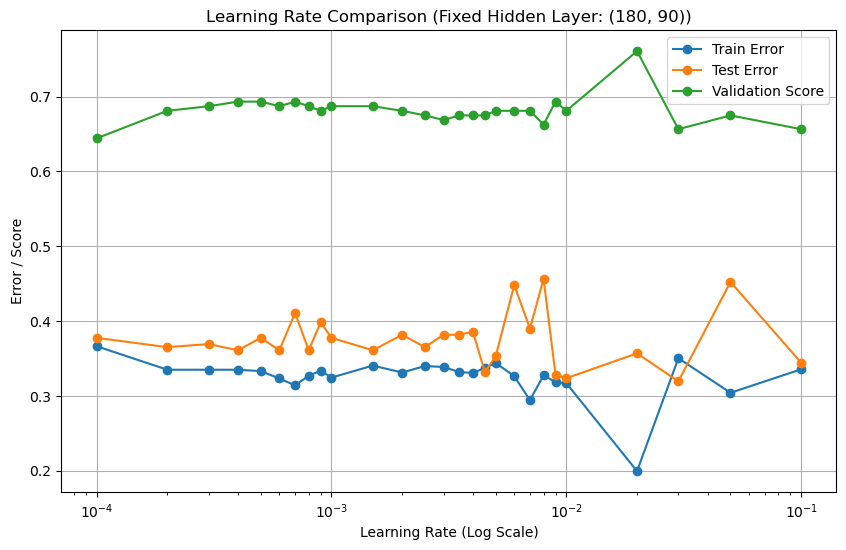

In [17]:
# Define learning rates between each power of 10 from 0.0001 to 0.1
learning_rates = [
    0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,
    0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01,
    0.02, 0.03, 0.05, 0.1
]

# Define a fixed hidden layer configuration (e.g., double-layer with 180 and 90 neurons)
fixed_hidden_layer = (180, 90)

# Results container
learning_rate_results_fixed = {'Learning Rate': [], 'Train Error': [], 'Test Error': [], 'Validation Score': []}

# Evaluate for each learning rate with the fixed hidden layer
for lr in learning_rates:
    model = MLPClassifier(
        hidden_layer_sizes=fixed_hidden_layer,  # Fixed hidden layer configuration
        activation='relu',  # Using ReLU for consistency
        learning_rate_init=lr,
        alpha=0.0001,
        max_iter=2000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
    model.fit(X_train_balanced, y_train_balanced)
    
    # Compute metrics
    train_error = 1 - accuracy_score(y_train_balanced, model.predict(X_train_balanced))
    test_error = 1 - accuracy_score(y_test, model.predict(X_test_scaled))
    val_score = max(model.validation_scores_) if hasattr(model, 'validation_scores_') else None
    
    # Store results
    learning_rate_results_fixed['Learning Rate'].append(lr)
    learning_rate_results_fixed['Train Error'].append(train_error)
    learning_rate_results_fixed['Test Error'].append(test_error)
    learning_rate_results_fixed['Validation Score'].append(val_score)

# Plot results
plt.figure(figsize=(10, 6))

# Plot Train Error, Test Error, and Validation Score
plt.plot(
    learning_rate_results_fixed['Learning Rate'],
    learning_rate_results_fixed['Train Error'],
    label='Train Error',
    marker='o'
)
plt.plot(
    learning_rate_results_fixed['Learning Rate'],
    learning_rate_results_fixed['Test Error'],
    label='Test Error',
    marker='o'
)
plt.plot(
    learning_rate_results_fixed['Learning Rate'],
    learning_rate_results_fixed['Validation Score'],
    label='Validation Score',
    marker='o'
)

# Set the x-axis to be logarithmic for better visualization of the learning rates
plt.xscale('log')

plt.xlabel('Learning Rate (Log Scale)')
plt.ylabel('Error / Score')
plt.title(f'Learning Rate Comparison (Fixed Hidden Layer: {fixed_hidden_layer})')
plt.legend()
plt.grid(True)
plt.show()

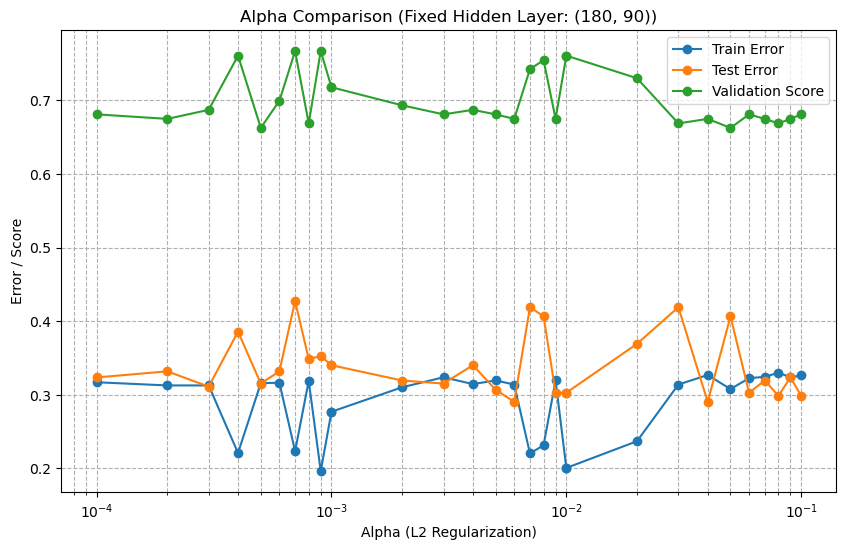

In [18]:
# Define a fixed hidden layer configuration (e.g., single-layer with 50 neurons)
fixed_hidden_layer = (180, 90)  # You can change this to any configuration, e.g., (50, 25) for double-layer

# Manually define alpha values in three ranges
alpha_values = np.concatenate([
    np.linspace(0.0001, 0.001, 10),   # 10 values between 0.0001 and 0.001
    np.linspace(0.001, 0.01, 10),     # 10 values between 0.001 and 0.01
    np.linspace(0.01, 0.1, 10)        # 10 values between 0.01 and 0.1
])

# Results container
alpha_results_fixed = {'Alpha': [], 'Train Error': [], 'Test Error': [], 'Validation Score': []}

# Evaluate for each alpha value with the fixed hidden layer
for alpha in alpha_values:
    model = MLPClassifier(
        hidden_layer_sizes=fixed_hidden_layer,  # Fixed hidden layer configuration
        activation='relu',  # Using ReLU for consistency
        learning_rate_init=0.01,
        alpha=alpha,  # L2 regularization parameter
        max_iter=2000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
    model.fit(X_train_balanced, y_train_balanced)
    
    # Compute metrics
    train_error = 1 - accuracy_score(y_train_balanced, model.predict(X_train_balanced))
    test_error = 1 - accuracy_score(y_test, model.predict(X_test_scaled))
    val_score = max(model.validation_scores_) if hasattr(model, 'validation_scores_') else None
    
    # Store results
    alpha_results_fixed['Alpha'].append(alpha)
    alpha_results_fixed['Train Error'].append(train_error)
    alpha_results_fixed['Test Error'].append(test_error)
    alpha_results_fixed['Validation Score'].append(val_score)

# Plot results
plt.figure(figsize=(10, 6))

plt.plot(
    alpha_results_fixed['Alpha'],
    alpha_results_fixed['Train Error'],
    label='Train Error',
    marker='o'
)
plt.plot(
    alpha_results_fixed['Alpha'],
    alpha_results_fixed['Test Error'],
    label='Test Error',
    marker='o'
)
plt.plot(
    alpha_results_fixed['Alpha'],
    alpha_results_fixed['Validation Score'],
    label='Validation Score',
    marker='o'
)

# Set logarithmic scale for the x-axis (alpha values)
plt.xscale('log')

# Set labels and title
plt.xlabel('Alpha (L2 Regularization)')
plt.ylabel('Error / Score')
plt.title(f'Alpha Comparison (Fixed Hidden Layer: {fixed_hidden_layer})')
plt.legend()
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks
plt.show()

# **SVM**


--------------------------------------------------
Training Results for SVM with Linear Kernel
--------------------------------------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters for Linear Model (F1_weighted-optimized):
gamma: scale
C: 0.01

Best Cross-Validation Score (F1_weighted): 0.626

Test Set Metrics (Linear Model, F1_weighted):
Precision: 0.779
Recall: 0.647
F1 Score: 0.694


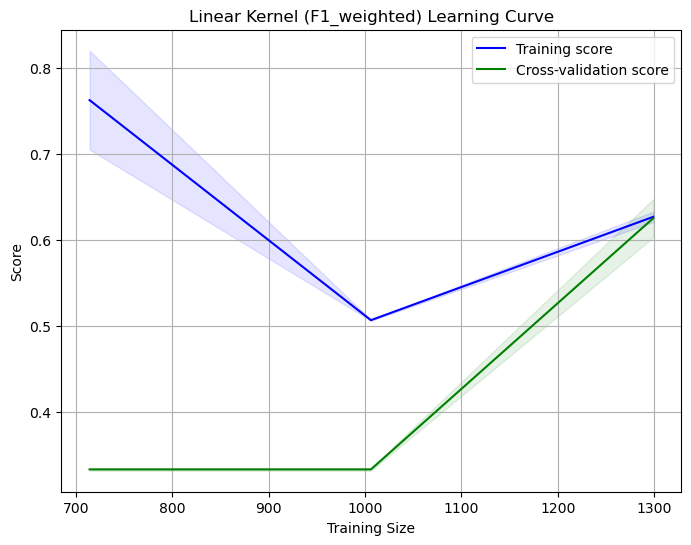

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters for Linear Model (Precision_weighted-optimized):
gamma: scale
C: 0.01

Best Cross-Validation Score (Precision_weighted): 0.627

Test Set Metrics (Linear Model, Precision_weighted):
Precision: 0.779
Recall: 0.647
F1 Score: 0.694


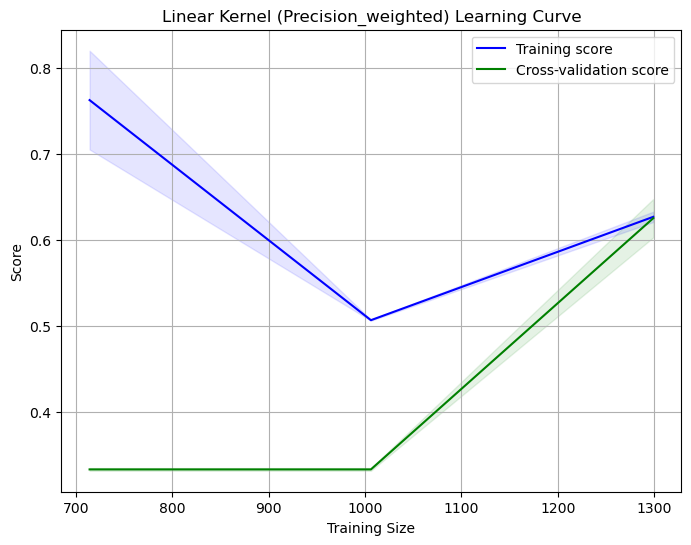

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters for Linear Model (Recall_weighted-optimized):
gamma: scale
C: 0.01

Best Cross-Validation Score (Recall_weighted): 0.626

Test Set Metrics (Linear Model, Recall_weighted):
Precision: 0.779
Recall: 0.647
F1 Score: 0.694


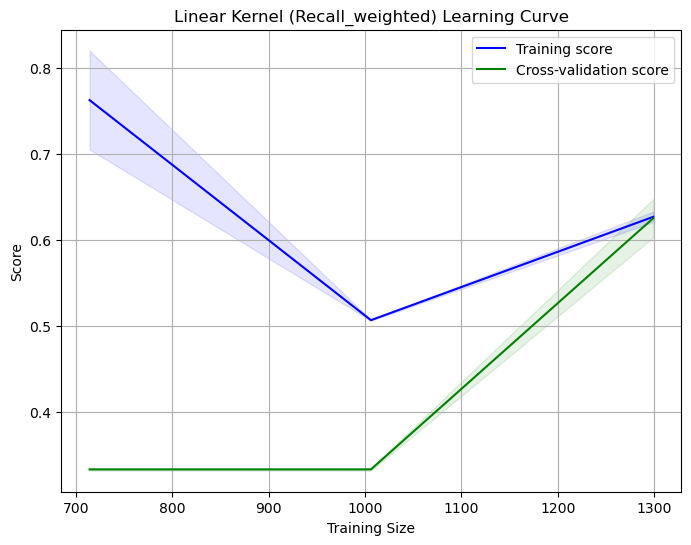


--------------------------------------------------
Training Results for SVM with Rbf Kernel
--------------------------------------------------
Fitting 5 folds for each of 63 candidates, totalling 315 fits

Best Parameters for Rbf Model (F1_weighted-optimized):
gamma: 5.0
C: 10

Best Cross-Validation Score (F1_weighted): 0.805

Test Set Metrics (Rbf Model, F1_weighted):
Precision: 0.769
Recall: 0.705
F1 Score: 0.732


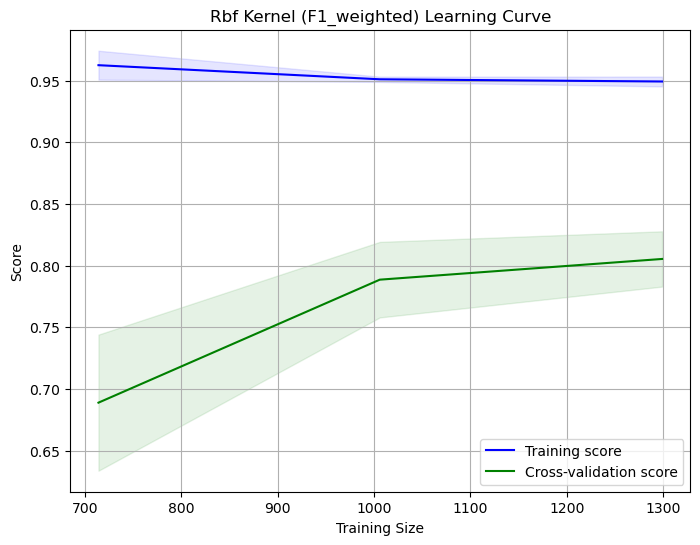

Fitting 5 folds for each of 63 candidates, totalling 315 fits


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/an


Best Parameters for Rbf Model (Precision_weighted-optimized):
gamma: 5.0
C: 10

Best Cross-Validation Score (Precision_weighted): 0.814

Test Set Metrics (Rbf Model, Precision_weighted):
Precision: 0.769
Recall: 0.705
F1 Score: 0.732


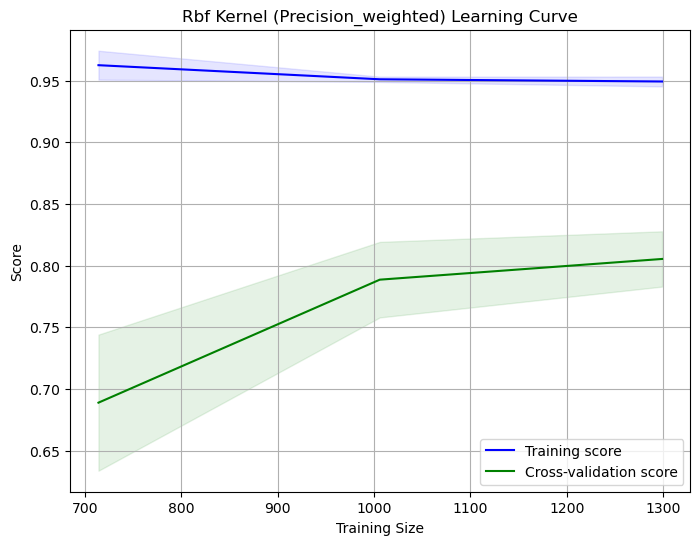

Fitting 5 folds for each of 63 candidates, totalling 315 fits

Best Parameters for Rbf Model (Recall_weighted-optimized):
gamma: 5.0
C: 10

Best Cross-Validation Score (Recall_weighted): 0.806

Test Set Metrics (Rbf Model, Recall_weighted):
Precision: 0.769
Recall: 0.705
F1 Score: 0.732


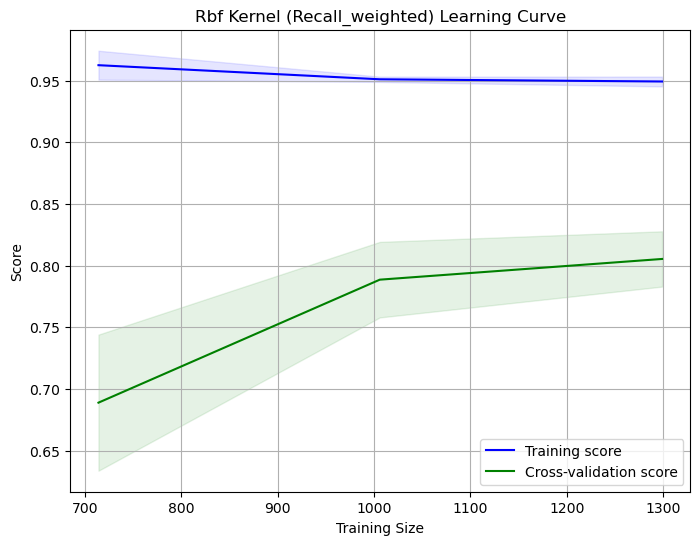


--------------------------------------------------
Training Results for SVM with Sigmoid Kernel
--------------------------------------------------
Fitting 5 folds for each of 240 candidates, totalling 1200 fits

Best Parameters for Sigmoid Model (F1_weighted-optimized):
gamma: 0.01
C: 1
coef0: 0.1

Best Cross-Validation Score (F1_weighted): 0.626

Test Set Metrics (Sigmoid Model, F1_weighted):
Precision: 0.779
Recall: 0.647
F1 Score: 0.694


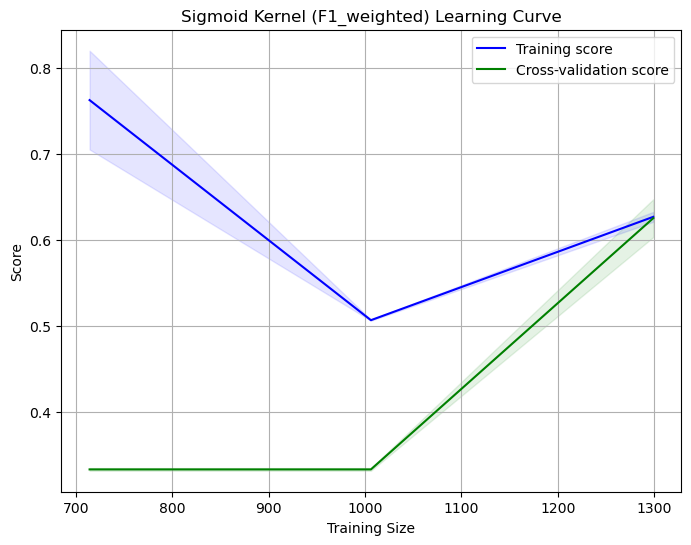

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/an


Best Parameters for Sigmoid Model (Precision_weighted-optimized):
gamma: 1.0
C: 0.1
coef0: 10

Best Cross-Validation Score (Precision_weighted): 0.645

Test Set Metrics (Sigmoid Model, Precision_weighted):
Precision: 0.722
Recall: 0.842
F1 Score: 0.778


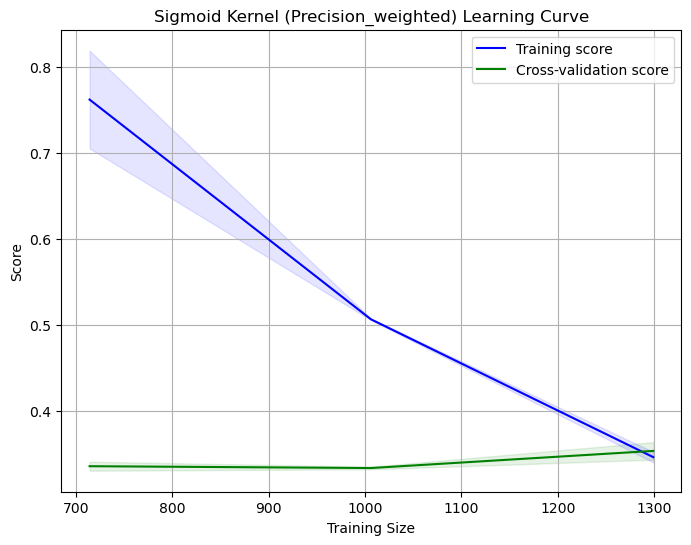

Fitting 5 folds for each of 240 candidates, totalling 1200 fits

Best Parameters for Sigmoid Model (Recall_weighted-optimized):
gamma: 0.01
C: 1
coef0: 0.1

Best Cross-Validation Score (Recall_weighted): 0.626

Test Set Metrics (Sigmoid Model, Recall_weighted):
Precision: 0.779
Recall: 0.647
F1 Score: 0.694


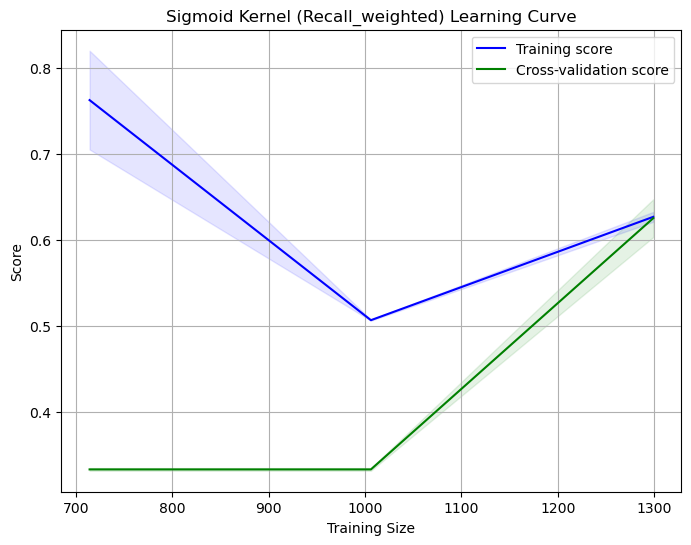

In [19]:
def plot_learning_curve(model, X_train, y_train, title="Learning Curve", scoring='f1_weighted'):
    """Generate and plot learning curves for a given model."""
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Compute the mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training score', color='blue')
    plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')

    # Plot the confidence intervals as shaded regions
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def train_and_evaluate_linear_rbf(X_train, X_test, y_train, y_test, kernel):
    """Train and evaluate SVM with linear or RBF kernel, optimized for F1, Precision, and Recall."""
    print(f"\n{'-'*50}\nTraining Results for SVM with {kernel.capitalize()} Kernel\n{'-'*50}")
    
    # Define parameter grid for linear and rbf kernels
    param_grid = {
        'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
        'gamma': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0] if kernel == 'rbf' else ['scale']
    }
    
    models = {}
    for scoring in ['f1_weighted', 'precision_weighted', 'recall_weighted']:
        # SVM model setup
        model = SVC(kernel=kernel, random_state=42)
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)

        # Best model and metrics
        print(f"\nBest Parameters for {kernel.capitalize()} Model ({scoring.capitalize()}-optimized):")
        
        # Directly print the best gamma value from grid search without recalculating
        best_params = grid_search.best_params_
        print(f"gamma: {best_params['gamma']}")
        
        for param, value in best_params.items():
            if param != 'gamma':  # Skip printing gamma here since it's already handled
                print(f"{param}: {value}")

        print(f"\nBest Cross-Validation Score ({scoring.capitalize()}): {grid_search.best_score_:.3f}")
        
        # Evaluate on test set
        y_pred = grid_search.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        fscore = f1_score(y_test, y_pred, average='weighted')

        print(f"\nTest Set Metrics ({kernel.capitalize()} Model, {scoring.capitalize()}):")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1 Score: {fscore:.3f}")
        
        # Plot learning curve for the best model
        plot_learning_curve(grid_search.best_estimator_, X_train, y_train, title=f"{kernel.capitalize()} Kernel ({scoring.capitalize()}) Learning Curve")

        # Save the best model for each scoring metric
        models[scoring] = grid_search.best_estimator_

    return models

def train_and_evaluate_sigmoid(X_train, X_test, y_train, y_test):
    """Train and evaluate SVM with sigmoid kernel, optimized for F1, Precision, and Recall."""
    print(f"\n{'-'*50}\nTraining Results for SVM with Sigmoid Kernel\n{'-'*50}")
    
    # Parameter grid for sigmoid kernel
    param_grid = {
        'C': [0.01, 0.05, 0.1, 1, 5, 10, 50, 100],
        'gamma': [0.01, 0.05, 0.1, 0.5, 1.0],
        'coef0': [0.1, 1, 5, 10, 50, 100]
    }

    models = {}
    for scoring in ['f1_weighted', 'precision_weighted', 'recall_weighted']:
        # SVM model setup
        model = SVC(kernel='sigmoid', random_state=42)
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)

        # Best model and metrics
        print(f"\nBest Parameters for Sigmoid Model ({scoring.capitalize()}-optimized):")
        
        # Directly print the best gamma value from grid search without recalculating
        best_params = grid_search.best_params_
        print(f"gamma: {best_params['gamma']}")
        
        for param, value in best_params.items():
            if param != 'gamma':  # Skip printing gamma here since it's already handled
                print(f"{param}: {value}")

        print(f"\nBest Cross-Validation Score ({scoring.capitalize()}): {grid_search.best_score_:.3f}")
        
        # Evaluate on test set
        y_pred = grid_search.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        fscore = f1_score(y_test, y_pred, average='weighted')

        print(f"\nTest Set Metrics (Sigmoid Model, {scoring.capitalize()}):")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1 Score: {fscore:.3f}")
        
        # Plot learning curve for the best model
        plot_learning_curve(grid_search.best_estimator_, X_train, y_train, title=f"Sigmoid Kernel ({scoring.capitalize()}) Learning Curve")

        # Save the best model for each scoring metric
        models[scoring] = grid_search.best_estimator_

    return models

def train_and_evaluate_svm(X_train, X_test, y_train, y_test):
    svm_models = {}

    # Train and evaluate linear and rbf kernels
    svm_models['linear'] = train_and_evaluate_linear_rbf(X_train, X_test, y_train, y_test, kernel='linear')
    svm_models['rbf'] = train_and_evaluate_linear_rbf(X_train, X_test, y_train, y_test, kernel='rbf')
    
    # Train and evaluate sigmoid kernel
    svm_models['sigmoid'] = train_and_evaluate_sigmoid(X_train, X_test, y_train, y_test)

    return svm_models

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed
# Run the SVM training and evaluation
svm_models = train_and_evaluate_svm(X_train_balanced, X_test_scaled, y_train_balanced, y_test)


Evaluation Metrics for Linear Kernel (F1_weighted-optimized):
Precision: 0.782
Recall: 0.660
F1 Score: 0.704

Evaluation Metrics for Linear Kernel (Precision_weighted-optimized):
Precision: 0.779
Recall: 0.647
F1 Score: 0.694

Evaluation Metrics for Linear Kernel (Recall_weighted-optimized):
Precision: 0.779
Recall: 0.647
F1 Score: 0.694

Evaluation Metrics for Rbf Kernel (F1_weighted-optimized):
Precision: 0.735
Recall: 0.693
F1 Score: 0.713

Evaluation Metrics for Rbf Kernel (Precision_weighted-optimized):
Precision: 0.769
Recall: 0.705
F1 Score: 0.732

Evaluation Metrics for Rbf Kernel (Recall_weighted-optimized):
Precision: 0.769
Recall: 0.705
F1 Score: 0.732

Evaluation Metrics for Sigmoid Kernel (F1_weighted-optimized):
Precision: 0.022
Recall: 0.149
F1 Score: 0.039

Evaluation Metrics for Sigmoid Kernel (Precision_weighted-optimized):
Precision: 0.722
Recall: 0.842
F1 Score: 0.778

Evaluation Metrics for Sigmoid Kernel (Recall_weighted-optimized):
Precision: 0.779
Recall: 0.647

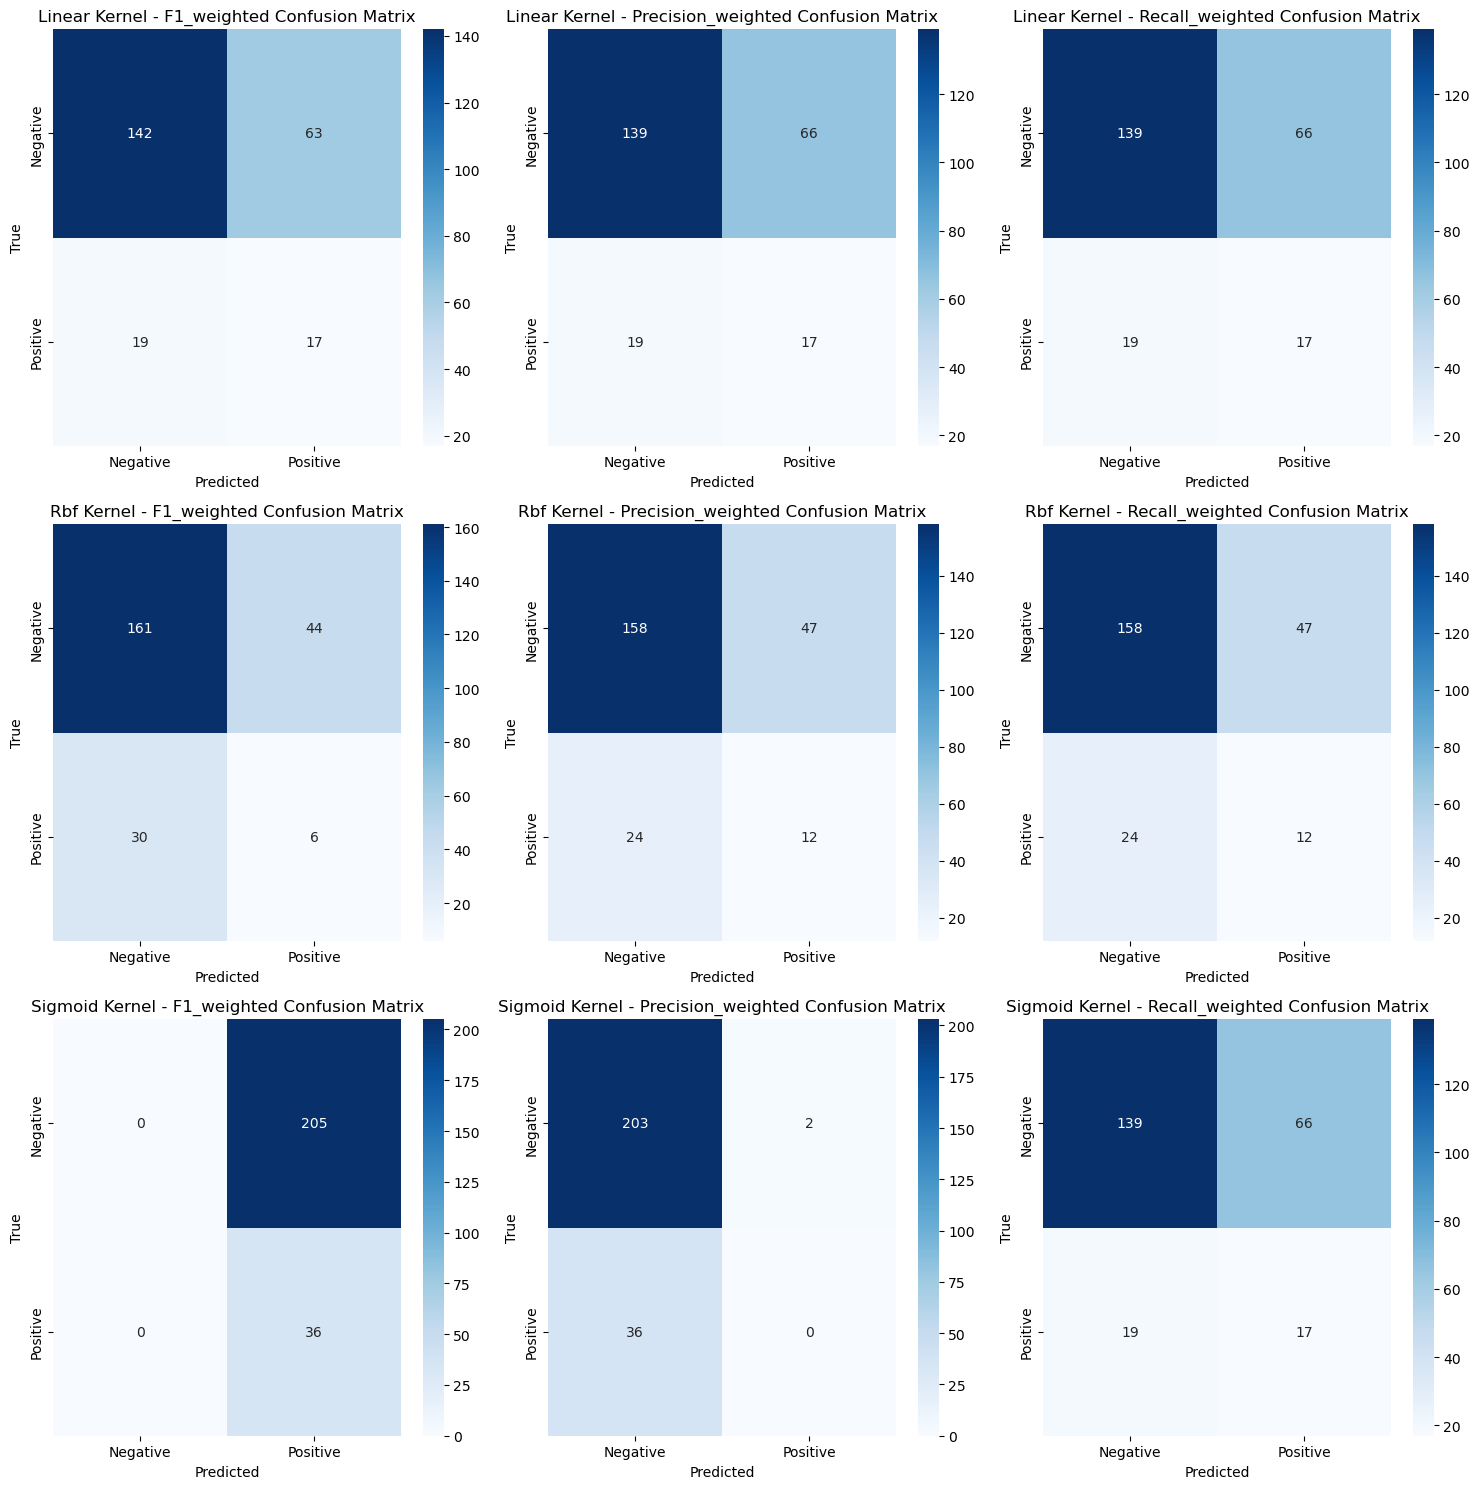

In [46]:
def plot_confusion_matrix(ax, y_true, y_pred, title="Confusion Matrix"):
    """Plot confusion matrix with labels on a specific axis."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

def print_evaluation_metrics(y_true, y_pred):
    """Print precision, recall, and F1 score."""
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    fscore = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {fscore:.3f}")

def evaluate_and_plot(models, X_test, y_test):
    """Evaluate models, print metrics, and plot confusion matrix for each model in a 3x3 grid."""
    # Set up a 3x3 grid of subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the 2D array to easily iterate

    # Keep track of the plot index
    plot_idx = 0

    for kernel, model_dict in models.items():
        for scoring, model in model_dict.items():
            # Predict on test data
            y_pred = model.predict(X_test)

            # Plot confusion matrix
            plot_confusion_matrix(axes[plot_idx], y_test, y_pred, title=f"{kernel.capitalize()} Kernel - {scoring.capitalize()} Confusion Matrix")

            # Print evaluation metrics
            print(f"\nEvaluation Metrics for {kernel.capitalize()} Kernel ({scoring.capitalize()}-optimized):")
            print_evaluation_metrics(y_test, y_pred)

            # Increment plot index
            plot_idx += 1

    # Adjust layout for better display
    plt.tight_layout()
    plt.show()

# Assuming svm_models contains models for each kernel and scoring metric
evaluate_and_plot(svm_models, X_test_scaled, y_test)


<Figure size 1400x1200 with 0 Axes>

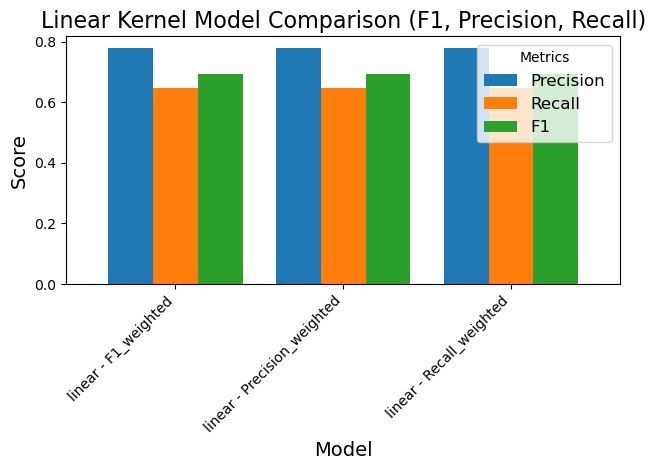

<Figure size 1400x1200 with 0 Axes>

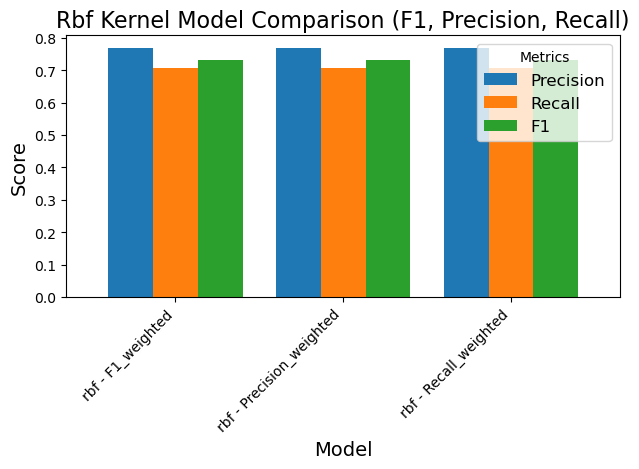

<Figure size 1400x1200 with 0 Axes>

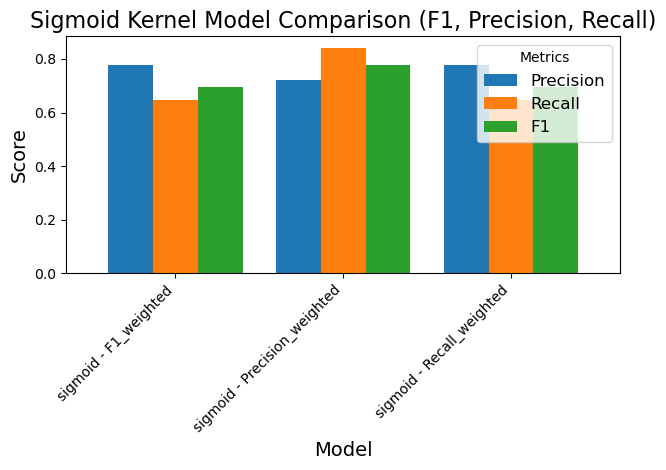

In [21]:
def plot_svm_kernel_comparison(svm_models, X_test, y_test):
    """Plot comparison of SVM models performances (Precision, Recall, F1) for each kernel type."""
    # Iterate through each kernel type
    for kernel in ['linear', 'rbf', 'sigmoid']:
        metrics = []
        
        # Loop through the models for the given kernel type
        for scoring, model in svm_models[kernel].items():
            y_pred = model.predict(X_test)
            metrics.append({
                'Model': f'{kernel} - {scoring.capitalize()}',
                'Precision': precision_score(y_test, y_pred, average='weighted'),
                'Recall': recall_score(y_test, y_pred, average='weighted'),
                'F1': f1_score(y_test, y_pred, average='weighted')
            })
        
        # Convert the metrics into a DataFrame for easy plotting
        df = pd.DataFrame(metrics)
        df.set_index('Model', inplace=True)
        
        # Plot the comparison for the current kernel type as a bar chart
        plt.figure(figsize=(14, 12))  # Set the figure size to make it taller
        ax = df.plot(kind='bar', width=0.8)
        
        # Set the title and labels
        plt.title(f'{kernel.capitalize()} Kernel Model Comparison (F1, Precision, Recall)', fontsize=16)
        plt.xlabel('Model', fontsize=14)
        plt.ylabel('Score', fontsize=14)
        plt.legend(title='Metrics', fontsize=12)
        
        # Rotate x-axis labels, make them smaller, and wrap them
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
        
        # Wrap the labels using a simple manual line break approach
        for label in ax.get_xticklabels():
            label.set_text('\n'.join(label.get_text().split(' - ')))  # Split and wrap
        
        plt.tight_layout()
        plt.show()

# Call the function to plot comparison for all kernel types
plot_svm_kernel_comparison(svm_models, X_test_scaled, y_test)

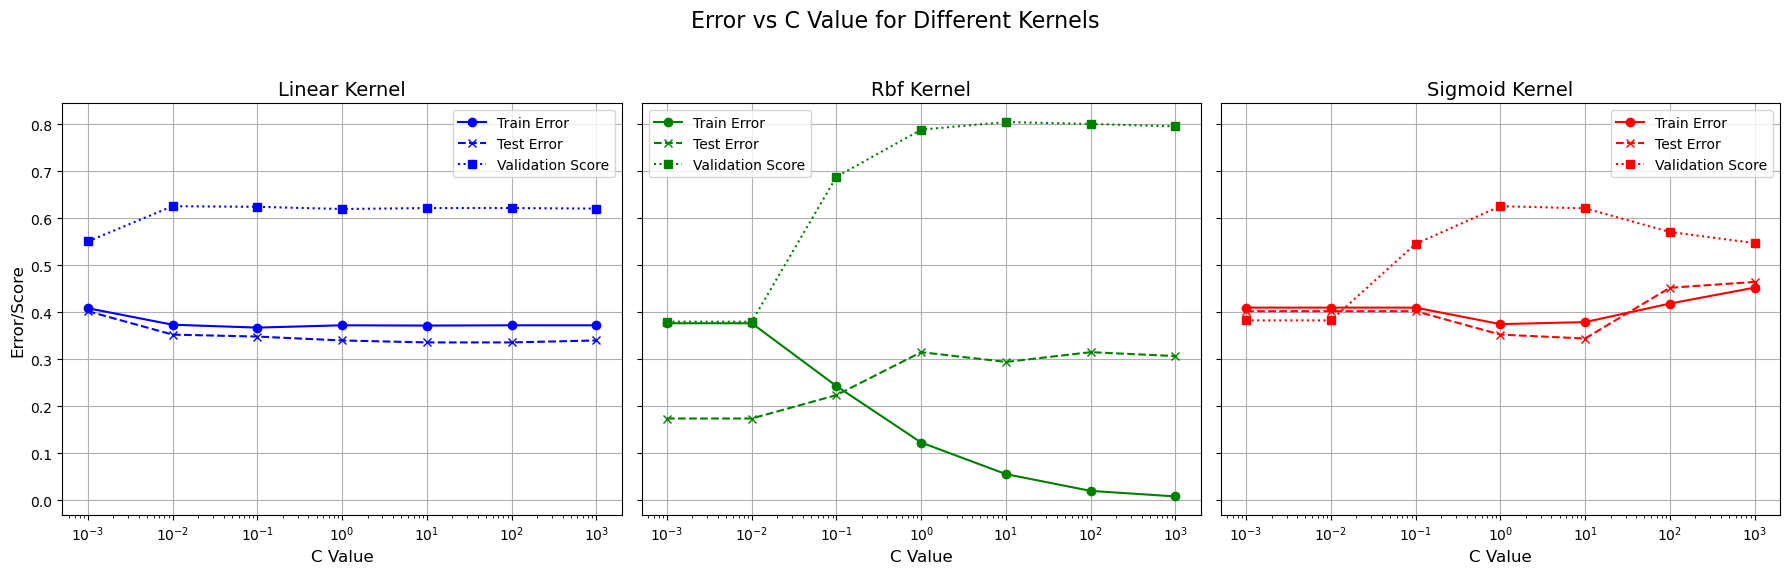

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

def plot_c_vs_error_separate(models, X_train, y_train, X_test, y_test):
    # Define the C values to test
    c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

    # Colors and markers for score types
    markers = {'train': 'o', 'test': 'x', 'validation': 's'}
    line_styles = {'train': '-', 'test': '--', 'validation': ':'}

    # Create subplots for each kernel type
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 3 subplots in a single row

    # Kernel names and corresponding colors
    kernel_order = ['linear', 'rbf', 'sigmoid']
    kernel_colors = {'linear': 'blue', 'rbf': 'green', 'sigmoid': 'red'}

    # Iterate through each kernel type and corresponding model
    for idx, kernel in enumerate(kernel_order):
        ax = axes[idx]
        model_dict = models[kernel]

        # Select the model optimized for f1_weighted
        f1_model = model_dict['f1_weighted']

        # Get the best hyperparameters from the grid search
        best_params = f1_model.get_params()

        # Extract the fixed hyperparameters (exclude C)
        fixed_params = {key: value for key, value in best_params.items() if key != 'C'}

        # Initialize lists to store the errors and validation scores for each C value
        train_errors = []
        test_errors = []
        validation_scores = []

        # Iterate through the different values of C
        for c in c_values:
            # Update the model with the current value of C
            f1_model.set_params(C=c, **fixed_params)

            # Fit the model to the training data
            f1_model.fit(X_train, y_train)

            # Get the training and test scores
            train_score = f1_model.score(X_train, y_train)
            test_score = f1_model.score(X_test, y_test)

            # Get the cross-validation score (using f1_weighted)
            validation_score = cross_val_score(f1_model, X_train, y_train, cv=5, scoring='f1_weighted').mean()

            # Calculate the errors (1 - score)
            train_errors.append(1 - train_score)
            test_errors.append(1 - test_score)
            validation_scores.append(validation_score)

        # Plot the data for the current kernel
        ax.plot(
            c_values, train_errors, 
            label='Train Error', color=kernel_colors[kernel], linestyle=line_styles['train'], marker=markers['train']
        )
        ax.plot(
            c_values, test_errors, 
            label='Test Error', color=kernel_colors[kernel], linestyle=line_styles['test'], marker=markers['test']
        )
        ax.plot(
            c_values, validation_scores, 
            label='Validation Score', color=kernel_colors[kernel], linestyle=line_styles['validation'], marker=markers['validation']
        )

        # Customize each subplot
        ax.set_title(f'{kernel.capitalize()} Kernel', fontsize=14)
        ax.set_xlabel('C Value', fontsize=12)
        if idx == 0:  # Add ylabel only to the first subplot
            ax.set_ylabel('Error/Score', fontsize=12)
        ax.set_xscale('log')  # Log scale for better visualization
        ax.grid(True)
        ax.legend(fontsize=10)

    # Adjust layout for better visualization
    plt.suptitle('Error vs C Value for Different Kernels', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()

# Call this function to plot for F1-optimized models
plot_c_vs_error_separate(svm_models, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

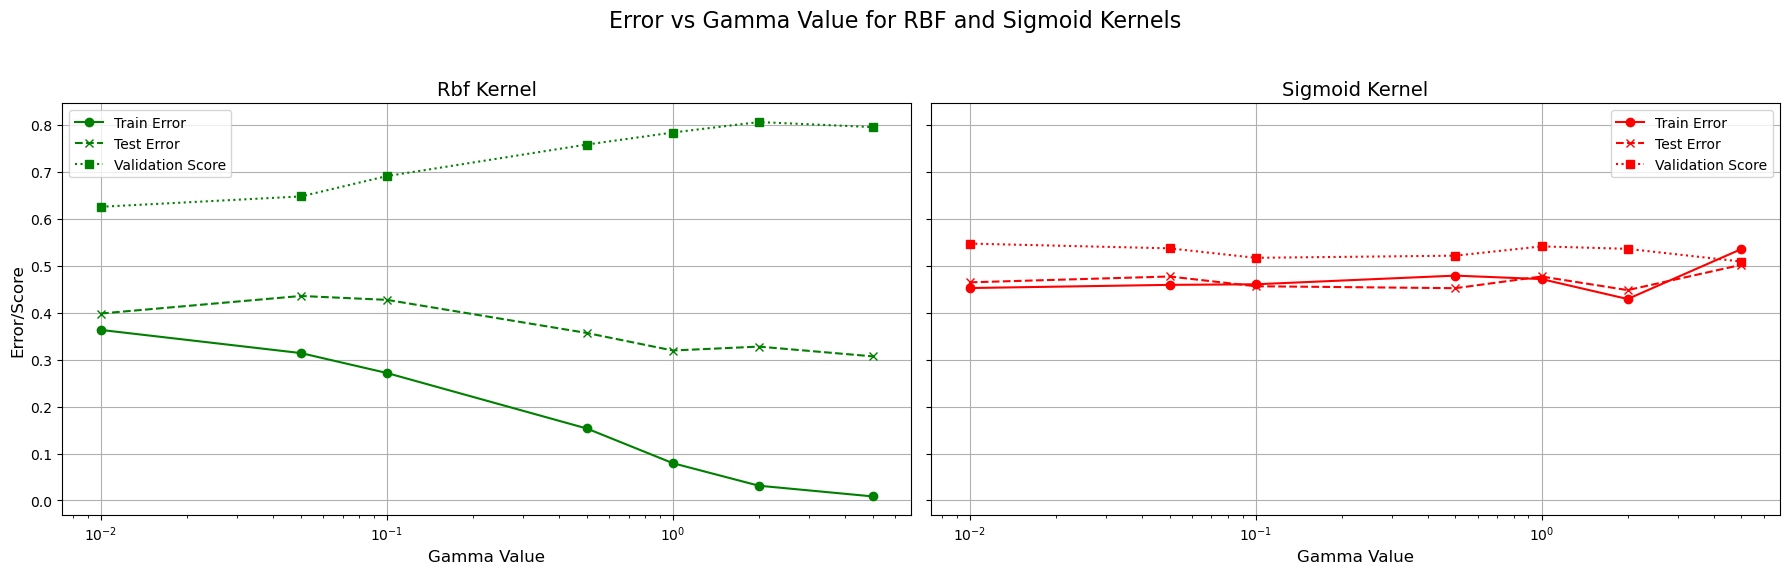

In [23]:
def plot_gamma_vs_error_separate(models, X_train, y_train, X_test, y_test):
    # Define the gamma values to test
    gamma_values = [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0]

    # Colors and markers for score types
    kernel_colors = {'rbf': 'green', 'sigmoid': 'red'}
    markers = {'train': 'o', 'test': 'x', 'validation': 's'}
    line_styles = {'train': '-', 'test': '--', 'validation': ':'}

    # Create subplots for RBF and Sigmoid kernels
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)  # 2 subplots in a single row

    # Iterate through each kernel type and corresponding model
    for idx, kernel in enumerate(['rbf', 'sigmoid']):
        ax = axes[idx]
        model_dict = models[kernel]

        # Select the model optimized for f1_weighted
        f1_model = model_dict['f1_weighted']

        # Get the best hyperparameters from the grid search
        best_params = f1_model.get_params()

        # Extract the fixed hyperparameters (exclude gamma)
        fixed_params = {key: value for key, value in best_params.items() if key != 'gamma'}

        # Initialize lists to store the errors and validation scores for each gamma value
        train_errors = []
        test_errors = []
        validation_scores = []

        # Iterate through the different values of gamma
        for gamma in gamma_values:
            # Update the model with the current value of gamma
            f1_model.set_params(gamma=gamma, **fixed_params)

            # Fit the model to the training data
            f1_model.fit(X_train, y_train)

            # Get the training and test scores
            train_score = f1_model.score(X_train, y_train)
            test_score = f1_model.score(X_test, y_test)

            # Get the cross-validation score (using f1_weighted)
            validation_score = cross_val_score(f1_model, X_train, y_train, cv=5, scoring='f1_weighted').mean()

            # Calculate the errors (1 - score)
            train_errors.append(1 - train_score)
            test_errors.append(1 - test_score)
            validation_scores.append(validation_score)

        # Plot the data for the current kernel
        ax.plot(
            gamma_values, train_errors,
            label='Train Error', color=kernel_colors[kernel], linestyle=line_styles['train'], marker=markers['train']
        )
        ax.plot(
            gamma_values, test_errors,
            label='Test Error', color=kernel_colors[kernel], linestyle=line_styles['test'], marker=markers['test']
        )
        ax.plot(
            gamma_values, validation_scores,
            label='Validation Score', color=kernel_colors[kernel], linestyle=line_styles['validation'], marker=markers['validation']
        )

        # Customize each subplot
        ax.set_title(f'{kernel.capitalize()} Kernel', fontsize=14)
        ax.set_xlabel('Gamma Value', fontsize=12)
        if idx == 0:  # Add ylabel only to the first subplot
            ax.set_ylabel('Error/Score', fontsize=12)
        ax.set_xscale('log')  # Log scale for better visualization
        ax.grid(True)
        ax.legend(fontsize=10)

    # Adjust layout for better visualization
    plt.suptitle('Error vs Gamma Value for RBF and Sigmoid Kernels', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()

# Call this function to plot for F1-optimized models
plot_gamma_vs_error_separate(svm_models, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

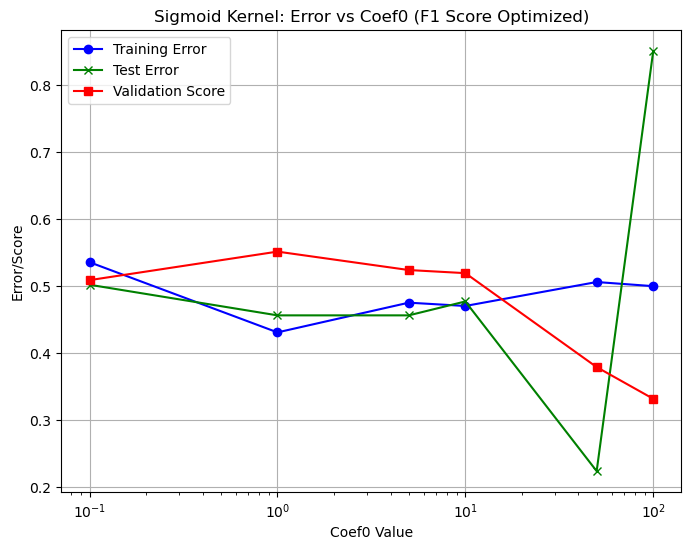

In [24]:
def plot_coef0_vs_error_for_sigmoid(models, X_train, y_train, X_test, y_test):
    # Define the coef0 values to test
    coef0_values = [0.1, 1, 5, 10, 50, 100]

    # Focus only on the sigmoid kernel
    f1_model = models['sigmoid']['f1_weighted']

    # Get the best hyperparameters from the grid search
    best_params = f1_model.get_params()

    # Extract the fixed hyperparameters (exclude coef0)
    fixed_params = {key: value for key, value in best_params.items() if key != 'coef0'}

    # Initialize lists to store the errors and validation scores for each coef0 value
    train_errors = []
    test_errors = []
    validation_scores = []

    # Iterate through the different values of coef0
    for coef0 in coef0_values:
        # Update the model with the current value of coef0
        f1_model.set_params(coef0=coef0, **fixed_params)
        
        # Fit the model to the training data
        f1_model.fit(X_train, y_train)

        # Get the training and test scores
        train_score = f1_model.score(X_train, y_train)
        test_score = f1_model.score(X_test, y_test)

        # Get the cross-validation score (using f1_weighted)
        validation_score = cross_val_score(f1_model, X_train, y_train, cv=5, scoring='f1_weighted').mean()

        # Calculate the errors (1 - score)
        train_errors.append(1 - train_score)
        test_errors.append(1 - test_score)
        validation_scores.append(validation_score)

    # Plotting the errors and validation score against coef0
    plt.figure(figsize=(8, 6))
    plt.plot(coef0_values, train_errors, label='Training Error', color='blue', marker='o')
    plt.plot(coef0_values, test_errors, label='Test Error', color='green', marker='x')
    plt.plot(coef0_values, validation_scores, label='Validation Score', color='red', marker='s')

    plt.title('Sigmoid Kernel: Error vs Coef0 (F1 Score Optimized)')
    plt.xlabel('Coef0 Value')
    plt.ylabel('Error/Score')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')  # Log scale to make it easier to visualize the wide range of coef0 values
    plt.show()

# Call this function to plot for Sigmoid kernel's coef0 values
plot_coef0_vs_error_for_sigmoid(svm_models, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

# **K-Nearest Neighbour**


--------------------------------------------------
KNN with F1_weighted Optimization
--------------------------------------------------

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters for Base Model (F1_weighted-optimized):
n_neighbors: 1
Weighting: uniform
Metric: manhattan

Best Cross-Validation Score (F1_weighted): 0.803
Precision: 0.757
Recall: 0.680
F1 Score: 0.713


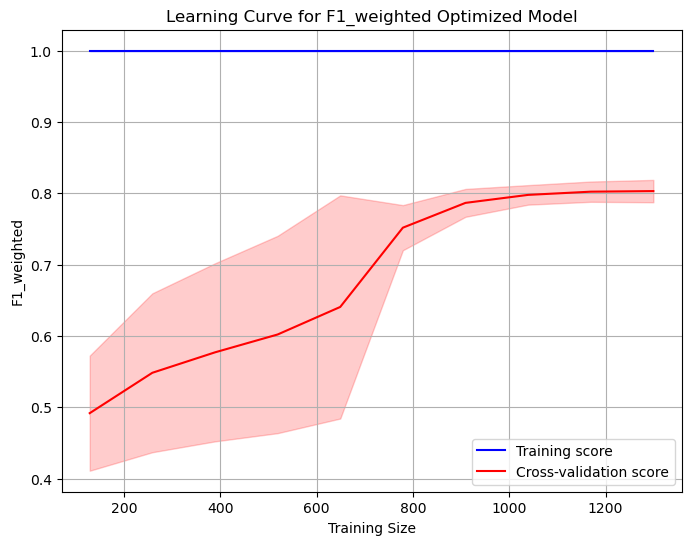


--------------------------------------------------
KNN with Precision_weighted Optimization
--------------------------------------------------

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters for Base Model (Precision_weighted-optimized):
n_neighbors: 1
Weighting: uniform
Metric: manhattan

Best Cross-Validation Score (Precision_weighted): 0.810
Precision: 0.757
Recall: 0.680
F1 Score: 0.713


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/an

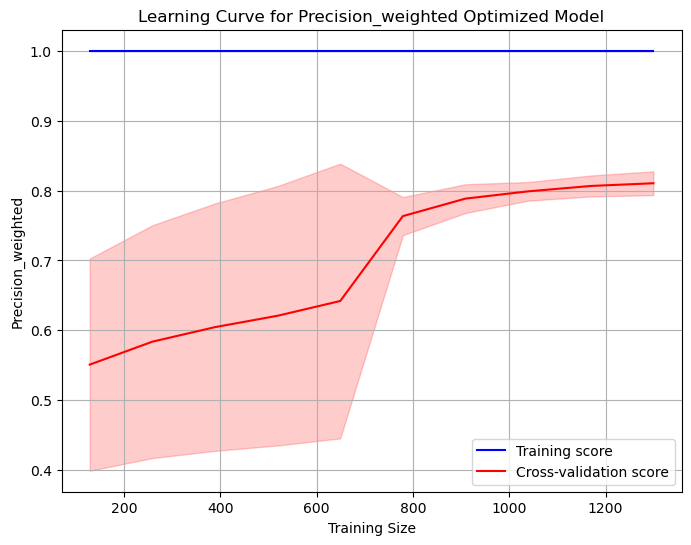


--------------------------------------------------
KNN with Recall_weighted Optimization
--------------------------------------------------

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters for Base Model (Recall_weighted-optimized):
n_neighbors: 1
Weighting: uniform
Metric: manhattan

Best Cross-Validation Score (Recall_weighted): 0.804
Precision: 0.757
Recall: 0.680
F1 Score: 0.713


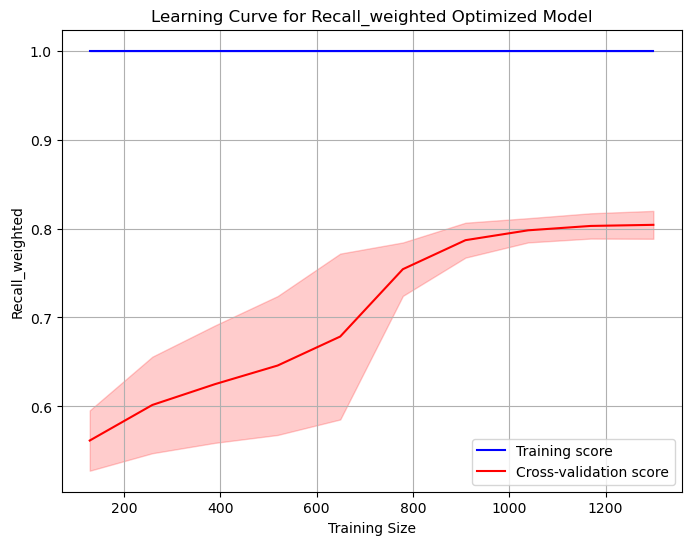


Total training time: 3.73 seconds


In [67]:
def train_and_evaluate_knn(X_train, X_test, y_train, y_test):
    """
    Train and evaluate KNN models optimized for F1-score, precision, and recall.
    """
    start_time = time.time()
    
    # Step 1: Parameter grid and model training
    param_grid = {
        'n_neighbors': list(range(1, 51, 2)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    
    # Create a list of metrics for which we will optimize the model
    metrics = ['f1_weighted', 'precision_weighted', 'recall_weighted']
    knn_models = {}
    
    for metric in metrics:
        # Print a clear heading for each model
        print(f"\n{'-'*50}")
        print(f"KNN with {metric.capitalize()} Optimization")
        print(f"{'-'*50}\n")
        
        knn = KNeighborsClassifier()
        grid_search = GridSearchCV(
            knn,
            param_grid,
            cv=5,
            scoring=metric,
            n_jobs=-1,
            verbose=1
        )
        
        grid_search.fit(X_train, y_train)
        knn_models[metric] = grid_search.best_estimator_
        
        # Display best parameters and best cross-validation score with a separator line
        print(f"\nBest Parameters for Base Model ({metric.capitalize()}-optimized):")
        print(f"n_neighbors: {grid_search.best_params_['n_neighbors']}")
        print(f"Weighting: {grid_search.best_params_['weights']}")
        print(f"Metric: {grid_search.best_params_['metric']}")
        print(f"\nBest Cross-Validation Score ({metric.capitalize()}): {grid_search.best_score_:.3f}")
        
        # Test set metrics
        y_pred = grid_search.best_estimator_.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1 Score: {f1:.3f}")
        
        # Plot the learning curve for this model
        plot_learning_curve(grid_search.best_estimator_, X_train, y_train, title=f"Learning Curve for {metric.capitalize()} Optimized Model", scoring=metric)
    
    execution_time = time.time() - start_time
    print(f"\nTotal training time: {execution_time:.2f} seconds")
    
    return knn_models

def plot_learning_curve(model, X_train, y_train, title="Learning Curve", scoring='accuracy'):
    """
    Plot the learning curve for the model.
    """
    # Getting training and test scores for different training sizes
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring=scoring, 
        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Calculate mean and standard deviation for train and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training score", color="blue")
    plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")
    
    # Fill between the standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
    
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel(scoring.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the training and evaluation for all metrics
knn_models = train_and_evaluate_knn(X_train_balanced, X_test_scaled, y_train_balanced, y_test)


--------------------------------------------------
KNN with F1_weighted Optimization
--------------------------------------------------
F1_weighted Optimized Model Metrics:
  Precision: 0.757
  Recall: 0.680
  F1 Score: 0.713

--------------------------------------------------
KNN with Precision_weighted Optimization
--------------------------------------------------
Precision_weighted Optimized Model Metrics:
  Precision: 0.757
  Recall: 0.680
  F1 Score: 0.713

--------------------------------------------------
KNN with Recall_weighted Optimization
--------------------------------------------------
Recall_weighted Optimized Model Metrics:
  Precision: 0.757
  Recall: 0.680
  F1 Score: 0.713


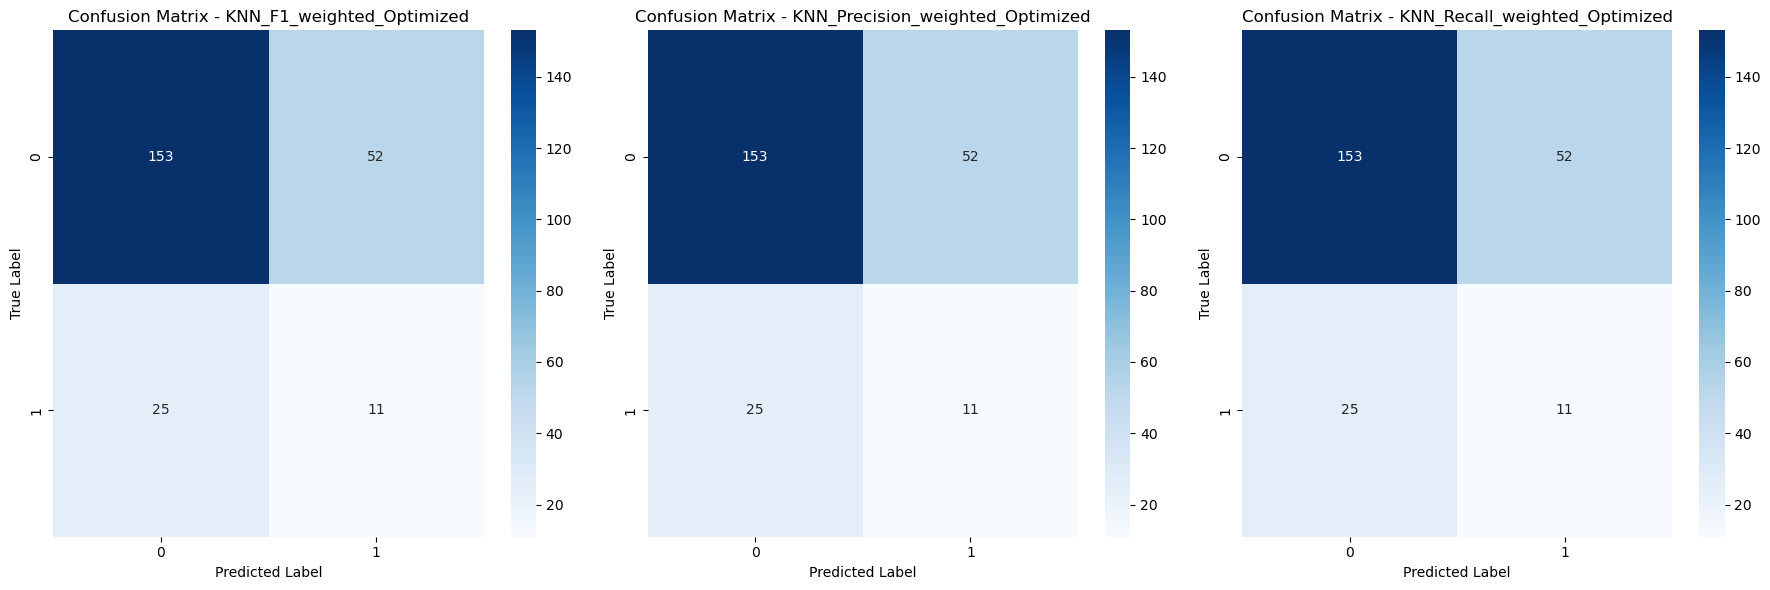

In [68]:
# Function to print precision, recall, and F1 score for a model
def print_metrics(y_true, y_pred):
    """Print precision, recall, and F1 score for a given model."""
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall: {recall:.3f}")
    print(f"  F1 Score: {f1:.3f}")

# Function to plot confusion matrix for a model
def plot_confusion_matrix(ax, y_true, y_pred, title):
    """Plot confusion matrix on a given axis."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

# Function to plot confusion matrices and print metrics for KNN models
def plot_confusion_matrices_and_metrics_knn(models, X_test, y_test):
    """Plot confusion matrices and print metrics for KNN models optimized for F1, Precision, and Recall."""
    metrics = ['f1_weighted', 'precision_weighted', 'recall_weighted']
    
    # Create a single row of subplots for the confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust width to fit 3 confusion matrices
    for idx, metric in enumerate(metrics):
        print(f"\n{'-'*50}\nKNN with {metric.capitalize()} Optimization\n{'-'*50}")
        
        # Get the model optimized for this metric
        model = models[metric]
        
        # Make predictions with the optimized model
        y_pred = model.predict(X_test)
        
        # Plot confusion matrix on the corresponding axis
        plot_confusion_matrix(axes[idx], y_test, y_pred, f"KNN_{metric.capitalize()}_Optimized")
        
        # Print performance metrics
        print(f"{metric.capitalize()} Optimized Model Metrics:")
        print_metrics(y_test, y_pred)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Assuming 'knn_models' contains the models optimized for F1, Precision, and Recall.
plot_confusion_matrices_and_metrics_knn(knn_models, X_test_scaled, y_test)

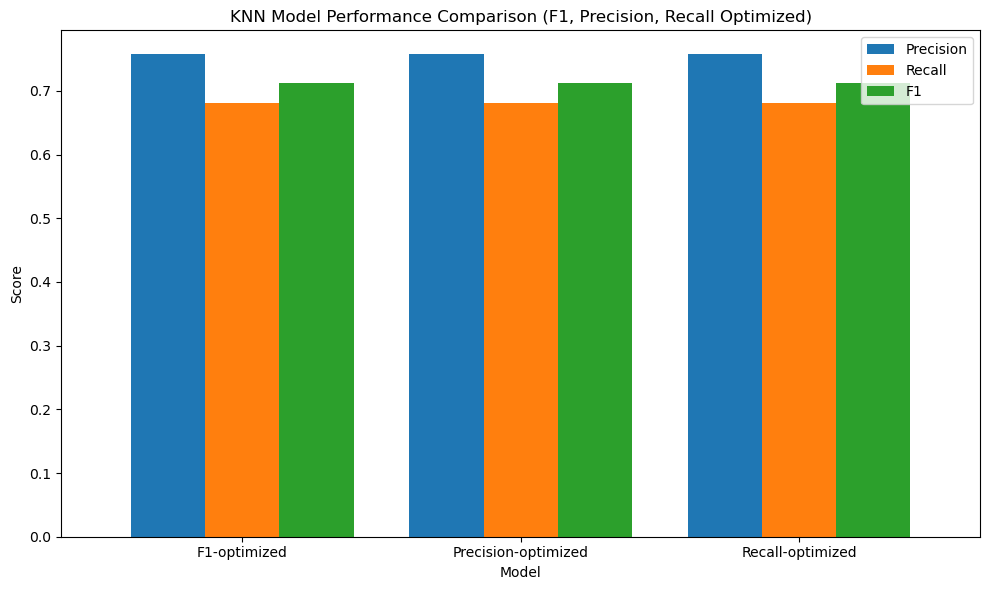

In [69]:
def plot_knn_model_comparison(y_test, models, X_test):
    """Plot a single comparison of KNN model performances (F1-optimized, Precision-optimized, and Recall-optimized)."""
    metrics = []
    
    # Loop through the models and calculate metrics for each
    for name, model in models.items():
        y_pred = model.predict(X_test)
        metrics.append({
            'Model': name,
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1': f1_score(y_test, y_pred, average='weighted')
        })
    
    # Create a DataFrame for easy plotting
    df = pd.DataFrame(metrics)
    df.set_index('Model', inplace=True)
    
    # Plot a single bar chart comparing the three models
    ax = df.plot(kind='bar', width=0.8, figsize=(10, 6))
    plt.title('KNN Model Performance Comparison (F1, Precision, Recall Optimized)')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Example usage for Cell 1
# Assuming 'knn_models' contains the models optimized for F1, Precision, and Recall.
plot_knn_model_comparison(y_test, {
    'F1-optimized': knn_models['f1_weighted'],
    'Precision-optimized': knn_models['precision_weighted'],
    'Recall-optimized': knn_models['recall_weighted']
}, X_test_scaled)


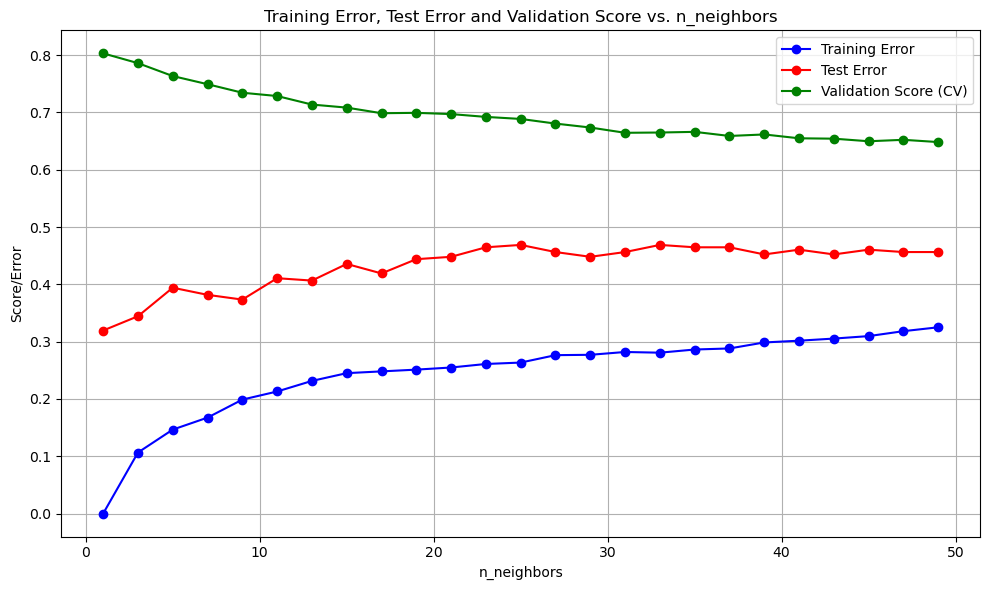

In [70]:
# Function to plot training error, test error, and validation score vs. n_neighbors
def plot_n_neighbors_vs_error_and_score(knn_models, X_train, X_test, y_train, y_test):
    """
    Plot training error, test error, and validation score against n_neighbors.
    """
    n_neighbors_values = list(range(1, 51, 2))
    train_errors = []
    test_errors = []
    cv_scores = []

    for n_neighbors in n_neighbors_values:
        model = knn_models['f1_weighted']  # Using F1-optimized model as example
        model.set_params(n_neighbors=n_neighbors)
        
        # Train the model and get the training and test errors
        model.fit(X_train, y_train)
        train_error = 1 - model.score(X_train, y_train)
        test_error = 1 - model.score(X_test, y_test)
        
        # Cross-validation score (validation score)
        cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted'))
        
        train_errors.append(train_error)
        test_errors.append(test_error)
        cv_scores.append(cv_score)

    plt.figure(figsize=(10, 6))
    plt.plot(n_neighbors_values, train_errors, label="Training Error", color="blue", marker="o")
    plt.plot(n_neighbors_values, test_errors, label="Test Error", color="red", marker="o")
    plt.plot(n_neighbors_values, cv_scores, label="Validation Score (CV)", color="green", marker="o")
    
    plt.title("Training Error, Test Error and Validation Score vs. n_neighbors")
    plt.xlabel("n_neighbors")
    plt.ylabel("Score/Error")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example of calling the function
plot_n_neighbors_vs_error_and_score(knn_models, X_train_balanced, X_test_scaled, y_train_balanced, y_test)

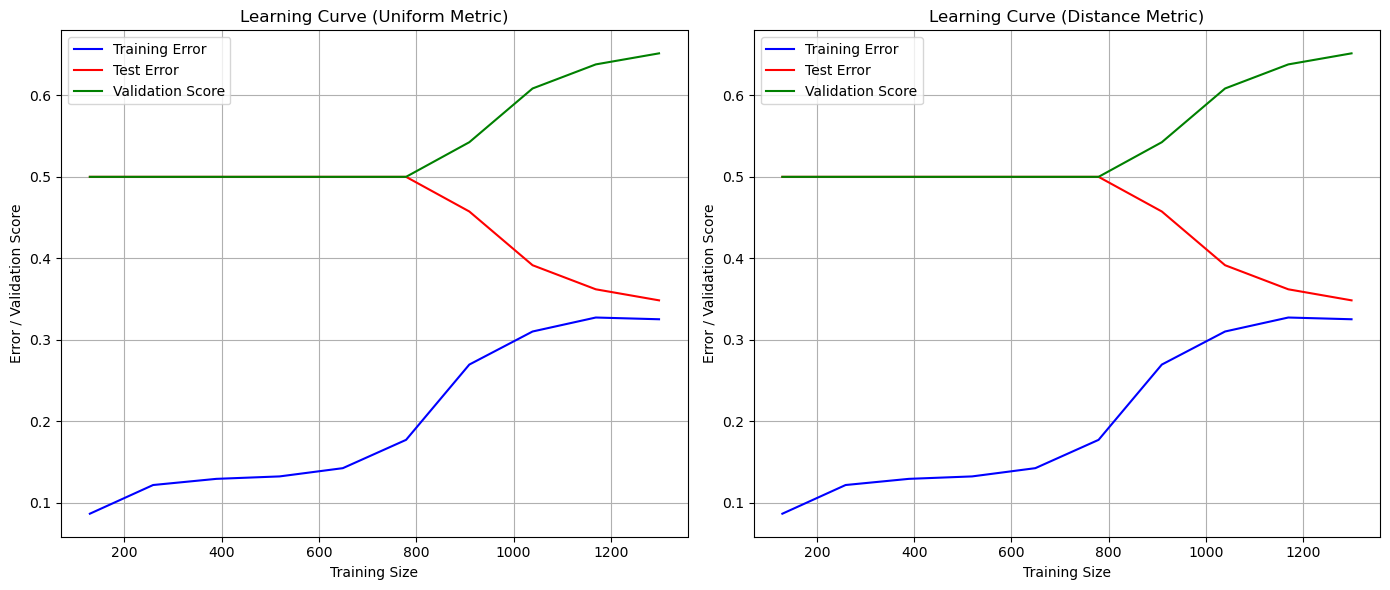

In [71]:
def plot_training_error_vs_iterations_regular_scale_loop(knn_models, X_train, y_train):
    """
    Plot the training error, test error, and validation score against training iterations for 
    the best KNN models with 'uniform' and 'distance' metrics, using a regular (linear) scale for training iterations.
    """
    metrics = ['uniform', 'distance']
    plt.figure(figsize=(14, 6))
    
    # Loop over both uniform and distance metrics
    for idx, metric in enumerate(metrics):
        # Get the best model for the current metric
        best_model = knn_models.get(f'f1_weighted')  # Adjust if needed to pick models by metric
        
        # Getting learning curve data for the current metric model
        train_sizes, train_scores, test_scores = learning_curve(
            best_model, X_train, y_train, cv=5, scoring='accuracy', 
            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
        )
        
        # Calculate mean for train and test scores
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        
        # Calculate the training error (1 - training score) and test error (1 - test score)
        train_error = 1 - train_mean
        test_error = 1 - test_mean
        
        # Create a subplot for each metric
        plt.subplot(1, 2, idx + 1)
        plt.plot(train_sizes, train_error, label="Training Error", color="blue")
        plt.plot(train_sizes, test_error, label="Test Error", color="red")
        plt.plot(train_sizes, test_mean, label="Validation Score", color="green")
        plt.title(f"Learning Curve ({metric.capitalize()} Metric)")
        plt.xlabel("Training Size")
        plt.ylabel("Error / Validation Score")
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the learning curves for both metrics with regular scale
plot_training_error_vs_iterations_regular_scale_loop(knn_models, X_train_balanced, y_train_balanced)

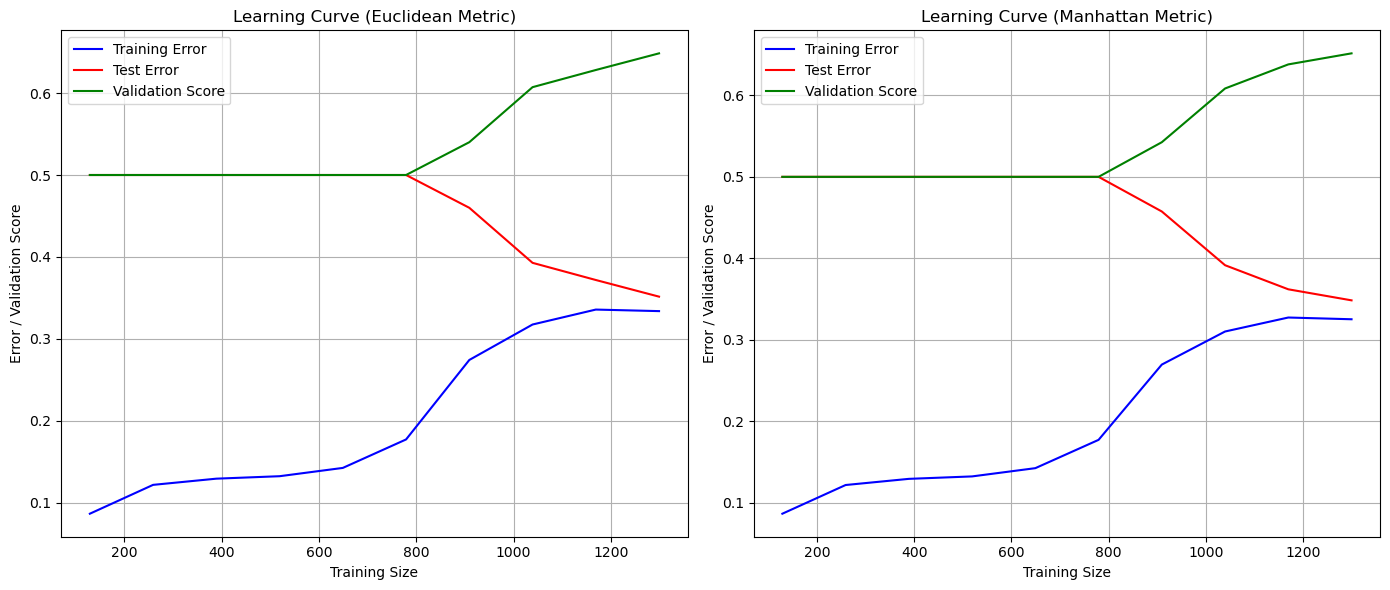

In [72]:
def plot_training_error_vs_iterations_metrics(best_model, X_train, y_train):
    """
    Plot the training error, test error, and validation score against training iterations for 
    the best KNN model using 'euclidean' and 'manhattan' metrics, keeping other hyperparameters the same.
    """
    metrics = ['euclidean', 'manhattan']
    plt.figure(figsize=(14, 6))
    
    # Loop over both Euclidean and Manhattan metrics
    for idx, metric in enumerate(metrics):
        # Modify the model to use the current metric
        model = best_model.set_params(metric=metric)
        
        # Getting learning curve data for the current metric model
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, scoring='accuracy', 
            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
        )
        
        # Calculate mean for train and test scores
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        
        # Calculate the training error (1 - training score) and test error (1 - test score)
        train_error = 1 - train_mean
        test_error = 1 - test_mean
        
        # Create a subplot for each metric
        plt.subplot(1, 2, idx + 1)
        plt.plot(train_sizes, train_error, label="Training Error", color="blue")
        plt.plot(train_sizes, test_error, label="Test Error", color="red")
        plt.plot(train_sizes, test_mean, label="Validation Score", color="green")
        plt.title(f"Learning Curve ({metric.capitalize()} Metric)")
        plt.xlabel("Training Size")
        plt.ylabel("Error / Validation Score")
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the learning curves for both metrics (Euclidean and Manhattan)
plot_training_error_vs_iterations_metrics(knn_models['f1_weighted'], X_train_balanced, y_train_balanced)

# **Final Model Evaluation**

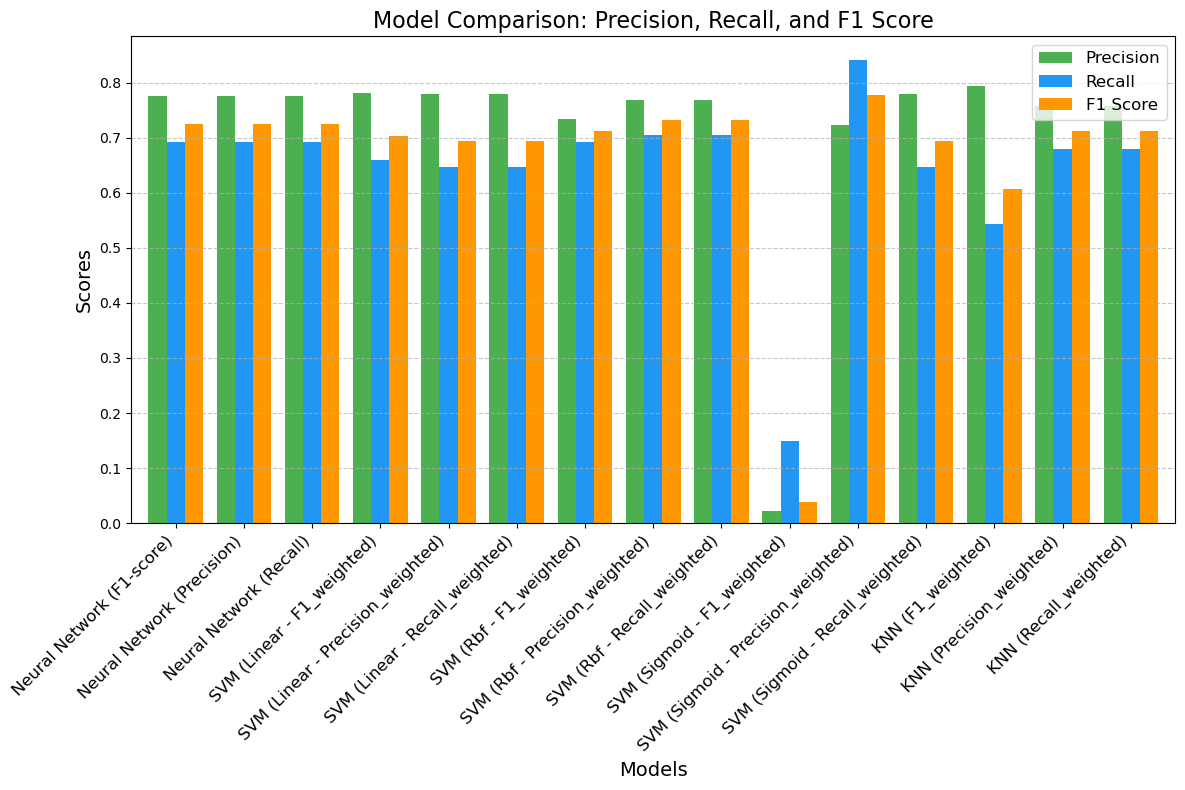


Model Metrics:
Neural Network (F1-score): Precision: 0.775, Recall: 0.693, F1 Score: 0.726
Neural Network (Precision): Precision: 0.775, Recall: 0.693, F1 Score: 0.726
Neural Network (Recall): Precision: 0.775, Recall: 0.693, F1 Score: 0.726
SVM (Linear - F1_weighted): Precision: 0.782, Recall: 0.660, F1 Score: 0.704
SVM (Linear - Precision_weighted): Precision: 0.779, Recall: 0.647, F1 Score: 0.694
SVM (Linear - Recall_weighted): Precision: 0.779, Recall: 0.647, F1 Score: 0.694
SVM (Rbf - F1_weighted): Precision: 0.735, Recall: 0.693, F1 Score: 0.713
SVM (Rbf - Precision_weighted): Precision: 0.769, Recall: 0.705, F1 Score: 0.732
SVM (Rbf - Recall_weighted): Precision: 0.769, Recall: 0.705, F1 Score: 0.732
SVM (Sigmoid - F1_weighted): Precision: 0.022, Recall: 0.149, F1 Score: 0.039
SVM (Sigmoid - Precision_weighted): Precision: 0.722, Recall: 0.842, F1 Score: 0.778
SVM (Sigmoid - Recall_weighted): Precision: 0.779, Recall: 0.647, F1 Score: 0.694
KNN (F1_weighted): Precision: 0.794, 

In [65]:
def extract_metrics_and_plot(nn_models, svm_models, knn_models, X_test_scaled, y_test):
    """
    Extract metrics (Precision, Recall, F1 Score) and hyperparameters from models.
    Plot a comparison of metrics for Neural Network, SVM, and KNN models, then print the metrics.
    """
    # Initialize a dictionary to store metrics
    metrics_dict = {
        'Model': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': [],
        'Hyperparameters': []  # Add hyperparameters storage
    }

    def process_model(model, name, hyperparameters):
        """Helper function to compute metrics and store them."""
        if model is None:
            return
        y_pred = model.predict(X_test_scaled)
        metrics_dict['Model'].append(name)  # Add the model name to the list
        metrics_dict['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
        metrics_dict['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
        metrics_dict['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
        metrics_dict['Hyperparameters'].append(hyperparameters)  # Add hyperparameters for each model

    # Process Neural Network models
    for metric, model in nn_models.items():
        hyperparams = model.get_params()  # Extract hyperparameters
        process_model(model, f"Neural Network ({metric.capitalize()})", hyperparams)

    # Process SVM models (nested structure)
    for kernel, kernel_models in svm_models.items():
        for metric, model in kernel_models.items():
            hyperparams = model.get_params()  # Extract hyperparameters
            process_model(model, f"SVM ({kernel.capitalize()} - {metric.capitalize()})", hyperparams)

    # Process KNN models
    for metric, model in knn_models.items():
        hyperparams = model.get_params()  # Extract hyperparameters
        process_model(model, f"KNN ({metric.capitalize()})", hyperparams)

    # Create a DataFrame from the collected metrics
    metrics_df = pd.DataFrame(metrics_dict)

    # Set the Model column as the index
    metrics_df.set_index('Model', inplace=True)

    # Plot the bar chart for metrics
    metrics_df[['Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12, 8), width=0.8, color=['#4CAF50', '#2196F3', '#FF9800'])
    plt.title("Model Comparison: Precision, Recall, and F1 Score", fontsize=16)
    plt.ylabel("Scores", fontsize=14)
    plt.xlabel("Models", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Print the metrics after the plot
    print("\nModel Metrics:")
    for i, row in metrics_df.iterrows():
        print(f"{i}: Precision: {row['Precision']:.3f}, Recall: {row['Recall']:.3f}, F1 Score: {row['F1 Score']:.3f}")

    return metrics_dict  # Return the metrics_dict for further use

# Example: Call the function with the appropriate models and data
metrics_dict = extract_metrics_and_plot(nn_models, svm_models, knn_models, X_test_scaled, y_test)

In [52]:
# Function to display the best models based on Precision, Recall, and F1 Score with filtered hyperparameters
def display_best_models(metrics_dict):
    # Convert the metrics_dict into a DataFrame for easy analysis
    metrics_df = pd.DataFrame(metrics_dict)
    
    # Find the index of the best model for each metric
    best_precision_idx = metrics_df['Precision'].idxmax()
    best_recall_idx = metrics_df['Recall'].idxmax()
    best_f1_score_idx = metrics_df['F1 Score'].idxmax()

    # Function to filter and display relevant hyperparameters
    def get_relevant_hyperparameters(model, model_type):
        if model_type == "NN":
            return {key: model[key] for key in ['hidden_layer_sizes', 'activation', 'learning_rate', 'alpha']}
        elif model_type == "SVM":
            # For SVM, check the kernel type and include relevant hyperparameters
            if 'kernel' in model and model['kernel'] in ['rbf', 'sigmoid']:
                return {key: model[key] for key in ['C', 'gamma', 'coef0']}
            else:
                return {key: model[key] for key in ['C']}
        elif model_type == "KNN":
            return {key: model[key] for key in ['n_neighbors', 'weights', 'metric']}
        else:
            return {}

    # Display the best model for Precision
    print("="*40)
    print("Best Model based on Precision:")
    print(f"Model: {metrics_df['Model'][best_precision_idx]}")
    print(f"Precision: {metrics_df['Precision'][best_precision_idx]:.3f}")
    print(f"Recall: {metrics_df['Recall'][best_precision_idx]:.3f}")
    print(f"F1 Score: {metrics_df['F1 Score'][best_precision_idx]:.3f}")
    print(f"Hyperparameters: {get_relevant_hyperparameters(metrics_df['Hyperparameters'][best_precision_idx], metrics_df['Model'][best_precision_idx].split()[0])}")
    print("="*40 + "\n")

    # Display the best model for Recall
    print("="*40)
    print("Best Model based on Recall:")
    print(f"Model: {metrics_df['Model'][best_recall_idx]}")
    print(f"Precision: {metrics_df['Precision'][best_recall_idx]:.3f}")
    print(f"Recall: {metrics_df['Recall'][best_recall_idx]:.3f}")
    print(f"F1 Score: {metrics_df['F1 Score'][best_recall_idx]:.3f}")
    print(f"Hyperparameters: {get_relevant_hyperparameters(metrics_df['Hyperparameters'][best_recall_idx], metrics_df['Model'][best_recall_idx].split()[0])}")
    print("="*40 + "\n")

    # Display the best model for F1 Score
    print("="*40)
    print("Best Model based on F1 Score:")
    print(f"Model: {metrics_df['Model'][best_f1_score_idx]}")
    print(f"Precision: {metrics_df['Precision'][best_f1_score_idx]:.3f}")
    print(f"Recall: {metrics_df['Recall'][best_f1_score_idx]:.3f}")
    print(f"F1 Score: {metrics_df['F1 Score'][best_f1_score_idx]:.3f}")
    print(f"Hyperparameters: {get_relevant_hyperparameters(metrics_df['Hyperparameters'][best_f1_score_idx], metrics_df['Model'][best_f1_score_idx].split()[0])}")
    print("="*40 + "\n")

# Call the function to display the best models
display_best_models(metrics_dict)

Best Model based on Precision:
Model: KNN (F1_weighted)
Precision: 0.794
Recall: 0.544
F1 Score: 0.607
Hyperparameters: {'n_neighbors': 49, 'weights': 'uniform', 'metric': 'manhattan'}

Best Model based on Recall:
Model: SVM (Sigmoid - Precision_weighted)
Precision: 0.722
Recall: 0.842
F1 Score: 0.778
Hyperparameters: {'C': 0.1, 'gamma': 1.0, 'coef0': 10}

Best Model based on F1 Score:
Model: SVM (Sigmoid - Precision_weighted)
Precision: 0.722
Recall: 0.842
F1 Score: 0.778
Hyperparameters: {'C': 0.1, 'gamma': 1.0, 'coef0': 10}



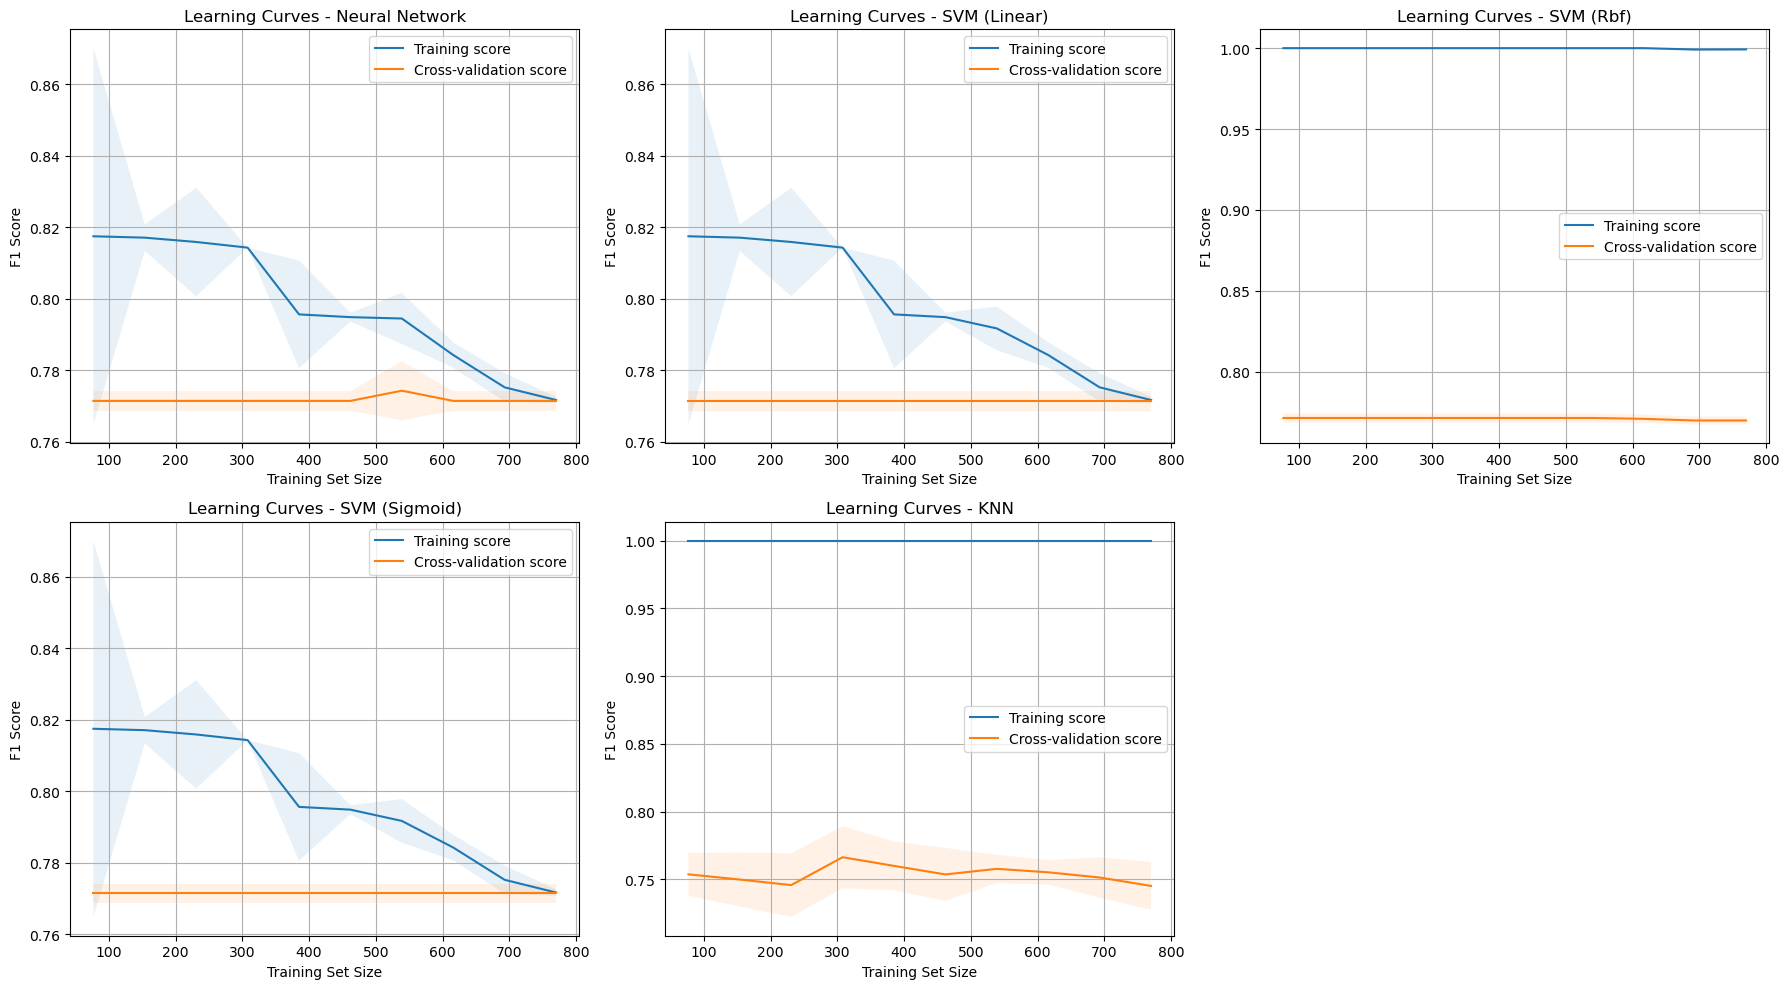

In [66]:
# Function to plot learning curves (only for the first 5 models)
def plot_learning_curves(models, X_train, X_test, y_train, y_test):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns grid (with one empty slot)
    axes = axes.ravel()  # Flatten the 2D array of axes for easier indexing

    for i, (model_name, model) in enumerate(models.items()):
        # Get learning curve data
        train_sizes = np.linspace(0.1, 1.0, 10)
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train,
            train_sizes=train_sizes, cv=5, scoring='f1_weighted', n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Plot learning curve for this model
        axes[i].plot(train_sizes, train_mean, label='Training score')
        axes[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
        axes[i].plot(train_sizes, test_mean, label='Cross-validation score')
        axes[i].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

        axes[i].set_xlabel('Training Set Size')
        axes[i].set_ylabel('F1 Score')
        axes[i].set_title(f'Learning Curves - {model_name}')
        axes[i].legend(loc='best')
        axes[i].grid(True)

    # Hide the sixth subplot (since it's not used)
    axes[5].axis('off')

    # Adjust layout to prevent overlap and show the plot
    plt.tight_layout()
    plt.show()

def train_models(X_train, y_train):
    # Manually input hyperparameters for each model
    models = {
        'Neural Network': MLPClassifier(
            activation='relu',
            alpha=0.005,
            early_stopping=True,
            hidden_layer_sizes=(180, 90),
            learning_rate_init=0.01,
            max_iter=2000,
            n_iter_no_change=10,
            solver='adam',
            validation_fraction=0.1
        ),
        'SVM (Linear)': SVC(kernel='linear', gamma=0.5, C=0.01),
        'SVM (Rbf)': SVC(kernel='rbf', gamma=5.0, C=10),
        'SVM (Sigmoid)': SVC(kernel='sigmoid', gamma=1.0, C=0.1, coef0=10),
        'KNN': KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='manhattan')
    }

    # Train each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)

    # Plot learning curves for all models in a single image
    plot_learning_curves(models, X_train, X_test, y_train, y_test)

    return models

# Example usage: Assuming X_train, X_test, y_train, and y_test are already defined
trained_models = train_models(X_train, y_train)